In [1]:
###take two
################################
######### xxxxxxx ##############
################################


#Ratign FIt regression
#COUNTRYES, 20 COUNTRIES
#Y DEPENDETENT, VARABLE ADAT LATESTS, AVERAGE 1 WEEK, AVERAGE 1 MONTH, AVEREAGE 3 MONTHS, 
#TIMESX4
#mODEL ADJUSTES MODEL 1, MODEL 2, MODEL1 FILTERED, MODEL 2 FILTERED
#Polinomical binomial X2 + X + C
####poliynocmic no constant
#Logaritmic exponetial LN() +C 
###Logaritmic no constant
# CUBIC?
#TIMESX4
#X INDEPEDNTEDN, ONLY RATING, RATING +OUTLOOK, RATING AND OUTLOOK EFFECTIVE. 
#TIMESX3

#------------------------------------------------------------
#m0110
#model 1 poli | all counntries nf | cds latest | rating x2x3x4
#m0120****adding half expectations
#model 1 poli | all counntries|  cds latest |  rating + outlook/0.5 x2x3x4
#m0130****adding full expectations
#model 1 poli | all counntries|  cds latest | rating + outlook*1 x2x3x4 
#filtered
#m0140
#model 1 poli | filtered countries | cds latest | rating x2x3x4 
#m0150
#model 1 poli | filtered countries | cds |latest | rating + outlook/0.5 x2x3x4
#m0160
#model 1 poli | filtered countries | cds latest | rating + outlook*1 x2x3x4
#-----------------------------------------------------
#m0210
#model 1 loga | all counntries nf | cds latest | rating
#m0220
#model 1 loga | all counntries | cds latest | rating + outlook/0.5
#m0230
#model 1 loga | all counntries | cds latest | rating + outlook*1
#filtered
#m0240
#model 1 loga | filtered countries | cds latest | rating
#m0250
#model 1 loga |  filtered countries | cds latest |  rating + outlook/0.5
#m0260
#model 1 loga | filtered countries | cds latest | rating + outlook*1
#--------------------------------------------------------------------
####loop for 5days, 30days, 90 days,



#Negative: The implied fit model indicates that the CDS spread should be higher than the current market spread. 
#Therefore the CDS spread is lower than the one implied by the aggregated ratings (market is pricing a lower risk than the rating agencies)

#Positive: The implied fit model indicates that the CDS spread should be lower than the current market spread. 
#Therefore the CDS spread is higher than the one implied by the aggregated ratings (market is pricing a higher risk than the rating agencies) 




#make databae
#df country, tickers, ratings, oulooks, cds in differnt prereidos, and then the time of today

#cahnge all ratings to a number qunatiative value
# chnage all outlooks to a number
#consoldiadte again database

In [2]:
## import packages, 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn import datasets
#from sklearn.tree import DecisionTreeClassifier 
import numpy
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime

import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# ignore any "invalid value in log" warnings internal to curve_fit() routine
import warnings
warnings.filterwarnings("ignore")
#https://stackoverflow.com/questions/59805561/python-using-curve-fit-to-fit-a-logarithmic-function


import pandas as pd 
import os

import PIL
from PIL import Image
#import os
from PyPDF2 import PdfFileMerger
from PyPDF2 import PdfFileMerger
import numpy as np 
from pandas.plotting import table

#from matplotlib import pyplot as plt
#from matplotlib import pyplot as plt

In [3]:
#rating_translation
##load dataset
rating_table = pd.read_csv (r'K:\2020_2431\q\sandbox\rating_translation.csv')
print(rating_table)
rating_table['number'] = rating_table['number'].round(0)
#create table for each ratign agency
moodys_table = rating_table[rating_table.agency == 'moodys']
del moodys_table['agency']
moodys_table=moodys_table.reset_index(drop=True)
print(moodys_table)
fitch_table = rating_table[rating_table.agency == 'fitch']
del fitch_table['agency']
fitch_table=fitch_table.reset_index(drop=True)
print(fitch_table)
sp_table = rating_table[rating_table.agency == 'sp']
del sp_table['agency']
sp_table=sp_table.reset_index(drop=True)
print(sp_table)

    agency rating  number
0   moodys    Aaa    20.0
1   moodys    Aa1    19.0
2   moodys    Aa2    18.0
3   moodys    Aa3    17.0
4   moodys     A1    16.0
..     ...    ...     ...
77   fitch    DDD     3.0
78   fitch     DD     2.0
79   fitch      D     1.0
80   fitch     NR     0.0
81   fitch     WD     0.0

[82 rows x 3 columns]
   rating  number
0     Aaa    20.0
1     Aa1    19.0
2     Aa2    18.0
3     Aa3    17.0
4      A1    16.0
5      A2    15.0
6      A3    14.0
7    Baa1    13.0
8    Baa2    12.0
9    Baa3    11.0
10    Ba1    10.0
11    Ba2     9.0
12    Ba3     8.0
13     B1     7.0
14     B2     6.0
15     B3     5.0
16   Caa1     4.0
17   Caa2     4.0
18   Caa3     4.0
19     Ca     3.0
20      C     2.0
21   Aa2u    19.0
22   Aaau    20.0
23  Baa3u    11.0
24  B2 *-     6.0
25    B2u     6.0
26   Aa3u    17.0
   rating  number
0     AAA    20.0
1     AA+    19.0
2      AA    18.0
3     AA-    17.0
4      A+    16.0
5       A    15.0
6      A-    14.0
7    BBB+    13.0

In [4]:
#load database
base001 = pd.read_csv (r'K:\2020_2431\q\sandbox\data_rating_fit.csv')
#contry, ticker, rating, moody, sp , fitch 
print(base001)
base=base001
base=base.reset_index(drop=True)
base_country=base.country

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  \
0          STABLE

In [5]:
##Emerging markets dummy, dummy identify EM 

base.loc[(base['country'] == 'South Korea') | 
         (base['country'] == 'Korea')|
         (base['country'] == 'Indonesia')| 
         (base['country'] == 'Thailand')| 
         (base['country'] == 'Malaysia')| 
         (base['country'] == 'China')| 
         (base['country'] == 'Philippines')| 
         (base['country'] == 'Brazil') | 
         (base['country'] == 'Mexico') | 
         (base['country'] == 'Colombia') | 
         (base['country'] == 'Chile') | 
         (base['country'] == 'Peru') |                 
         (base['country'] == 'Russia') | 
         (base['country'] == 'Turkey') | 
         (base['country'] == 'Israel') | 
         (base['country'] == 'South Africa') | 
         (base['country'] == 'Hungary')| 
         (base['country'] == 'Czech Republic')| 
         (base['country'] == 'Poland'), 'em_dummy'] = 1  

base.loc[(base['country'] != 'South Korea') & 
         (base['country'] != 'Korea') &
         (base['country'] != 'Indonesia') &
         (base['country'] != 'Thailand') &
         (base['country'] != 'Malaysia') &
         (base['country'] != 'China') &
         (base['country'] != 'Philippines') & 
         (base['country'] != 'Brazil') &
         (base['country'] != 'Mexico') & 
         (base['country'] != 'Colombia') & 
         (base['country'] != 'Chile') &
         (base['country'] != 'Peru') &                
         (base['country'] != 'Russia') & 
         (base['country'] != 'Turkey') & 
         (base['country'] != 'Israel') & 
         (base['country'] != 'South Africa') & 
         (base['country'] != 'Hungary') &
         (base['country'] != 'Czech Republic') &
         (base['country'] != 'Poland'), 'em_dummy'] = 0 




print(base)         
  

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  \
0          STABLE

In [6]:
#dUMMY REGION       
    
base.loc[(base['country'] == 'Brazil') | 
         (base['country'] == 'Mexico') | 
         (base['country'] == 'Colombia') | 
         (base['country'] == 'Chile') | 
         (base['country'] == 'Peru'), 'region001'] = 1  

base.loc[(base['country'] != 'Brazil') & 
         (base['country'] != 'Mexico') & 
         (base['country'] != 'Colombia') & 
         (base['country'] != 'Chile') & 
         (base['country'] != 'Peru'), 'region001'] = 0  

#region   
base.loc[(base['country'] == 'Russia') 
         | (base['country'] == 'Turkey')
         | (base['country'] == 'South Africa')
         | (base['country'] == 'Hungary')
         | (base['country'] == 'Poland'), 'region002'] = 1  

base.loc[(base['country'] != 'Russia') 
         & (base['country'] != 'Turkey')
         & (base['country'] != 'South Africa')
         & (base['country'] != 'Hungary')
         & (base['country'] != 'Poland'), 'region002'] = 0  

#region 

base.loc[(base['country'] == 'Korea') 
         | (base['country'] == 'Indonesia')
         | (base['country'] == 'Thailand')
         | (base['country'] == 'Malaysia')
         | (base['country'] == 'China')
         | (base['country'] == 'Philippines'), 'region003'] = 1  

base.loc[(base['country'] != 'Korea') & 
         (base['country'] != 'Indonesia') & 
         (base['country'] != 'Thailand') & 
         (base['country'] != 'Malaysia') & 
         (base['country'] != 'China') & 
         (base['country'] != 'Philippines'), 'region003'] = 0  



In [7]:
#MERGE RATING NUMBER
#rating_table['number']

#moodys_table
#base['moodys_rating_n'] = base['rating'].apply(lambda 'number': moodys_table['rating'])


base = pd.merge(base, moodys_table, how='left', left_on='rating_moodys', right_on='rating')
base=base.rename(columns = {'number':'moodys_rating_n'})
del base['rating']
base = pd.merge(base, fitch_table, how='left', left_on='rating_fitch', right_on='rating')
base=base.rename(columns = {'number':'fitch_rating_n'})
del base['rating']
base = pd.merge(base, sp_table, how='left', left_on='rating_sp', right_on='rating')
base=base.rename(columns = {'number':'sp_rating_n'})
del base['rating']


print(base)


        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  \
0          STABLE

In [8]:
#define logi of outlook
#STABLE     STABLE # NEG#POS#print(base)

def outlook_conditions(s):
    if (s['outlook_fitch'] =='NEG' ):
        return -1
    if (s['outlook_fitch'] =='STABLE' ):
        return 0
    if (s['outlook_fitch'] =='POS' ):
        return 1  
    else:
        return 0
    
base['outlook_fitch_n'] = base.apply(outlook_conditions, axis=1)

def outlook_conditions(s):
    if (s['outlook_moodys'] =='NEG' ):
        return -1
    if (s['outlook_moodys'] =='STABLE' ):
        return 0
    if (s['outlook_moodys'] =='POS' ):
        return 1  
    else:
        return 0
    
base['outlook_moodys_n'] = base.apply(outlook_conditions, axis=1)


def outlook_conditions(s):
    if (s['outlook_sp'] =='NEG' ):
        return -1
    if (s['outlook_sp'] =='STABLE' ):
        return 0
    if (s['outlook_sp'] =='POS' ):
        return 1  
    else:
        return 0
    
base['outlook_sp_n'] = base.apply(outlook_conditions, axis=1)

In [9]:
#determine if investmetne grade

#moodys baa3 investemtn grade,  ba1 non investmetne grade
#11 ins ivnestmetn grade, 10 non ivnestmetne grade
#sp bbb- investmetne grade ,bb+ non investmente grade
#11 ins ivnestmetn grade, 10 non ivnestmetne grade
#fitch bbb- investmetne grade, bb+ nmon investmetne grade
#11 ins ivnestmetn grade, 10 non ivnestmetne grade


#investment grade dummy

def ig_conditions(s):
    if (s['moodys_rating_n'] >= 11 ):
        return 1
    else:
        return 0

base['moodys_ig_d'] = base.apply(ig_conditions, axis=1)


def ig_conditions(s):
    if (s['fitch_rating_n'] >= 11 ):
        return 1
    else:
        return 0

base['fitch_ig_d'] = base.apply(ig_conditions, axis=1)


def ig_conditions(s):
    if (s['sp_rating_n'] >= 11 ):
        return 1
    else:
        return 0

base['sp_ig_d'] = base.apply(ig_conditions, axis=1)

print(base)

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  ...  \
0          S

In [10]:
# create all x independent variables combinations
base["average_rating_n"] = ((base["moodys_rating_n"]+base["fitch_rating_n"]+base["sp_rating_n"])/3)
base["average_rating_n"] = base["average_rating_n"].round(2)
print(base["average_rating_n"])
#####
base["moodys_rating_n_ef0"] = (base["moodys_rating_n"]+(base["outlook_moodys_n"]/2))
base["fitch_rating_n_ef0"] = (base["fitch_rating_n"]+(base["outlook_fitch_n"]/2))
base["sp_rating_n_ef0"] = (base["sp_rating_n"]+(base["outlook_sp_n"]/2))
#print(base)
base["average_rating_n_ef0"] = ((base["moodys_rating_n_ef0"]+base["fitch_rating_n_ef0"]+base["sp_rating_n_ef0"])/3)
base["average_rating_n_ef0"] = base["average_rating_n_ef0"].round(2)
print(base["average_rating_n_ef0"])
######
base["moodys_rating_n_ef1"] = (base["moodys_rating_n"]+base["outlook_moodys_n"])
base["fitch_rating_n_ef1"] = (base["fitch_rating_n"]+base["outlook_fitch_n"])
base["sp_rating_n_ef1"] = (base["sp_rating_n"]+base["outlook_sp_n"])
print(base)
#####
base["average_rating_n_ef1"] = ((base["moodys_rating_n_ef1"]+base["fitch_rating_n_ef1"]+base["sp_rating_n_ef1"])/3)
base["average_rating_n_ef1"] = base["average_rating_n_ef1"].round(2)
print(base["average_rating_n_ef1"])

0     19.67
1      8.33
2     11.00
3     12.00
4     15.00
      ...  
56    12.33
57    13.00
58     8.67
59    17.67
60     5.00
Name: average_rating_n, Length: 61, dtype: float64
0     19.50
1      8.17
2     10.67
3     11.67
4     14.83
      ...  
56    12.33
57    13.00
58     9.17
59    17.67
60     5.00
Name: average_rating_n_ef0, Length: 61, dtype: float64
        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     11

In [49]:
##quicksave
#base002=base
#base.to_clipboard(excel = True)
#https://www.w3schools.com/python/python_ml_polynomial_regression.asp
#print(base)
print(len(base))

61


In [52]:
###fitlkered database
# 10 bleiw invest greda
##11 is inveestmetn grade
base2 = base[base.average_rating_n > 10]
base2 = base2.reset_index(drop=True)
print(len(base2))
#print(base2)

50
            country              ticker rating_moodys rating_sp rating_fitch  \
0               USA     3352Z US Equity           Aaa      AA+u          AAA   
1          Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
2            Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
3             Chile    45793Z CI Equity            A1         A           A-   
4              Peru     1131Z PE Equity            A3      BBB+         BBB+   
5            Panama  3344634Z PP Equity          Baa2       BBB         BBB-   
6    United Kingdom     6152Z LN Equity          Aa3u       AAu          AA-   
7            France   223727Z FP Equity          Aa2u       AAu           AA   
8           Germany     3413Z GR Equity          Aaau      AAAu          AAA   
9             Italy     2103Z IM Equity         Baa3u      BBBu         BBB-   
10            Spain     1841Z SM Equity          Baa1        Au           A-   
11         Portugal     1174Z PL Equi

In [59]:

#file location
location_first= ("K:\\2020_2431\\q\\cds_report\\images\\rating_fit\\")
today = str(date.today())+"_"
location_last = '_fig.jpg'

title_graph="EM CDS - Rating Fit Model "
x_label="Average Rating [S&P, Ftch, and Mdys]"
y_label="CDS Value"

dateTimeObj = str(datetime.now())
print(dateTimeObj)

end = datetime.today().strftime('%Y-%m-%d')

parameter1 = 10
parameter2 = 7

2021-08-02 15:46:06.920120


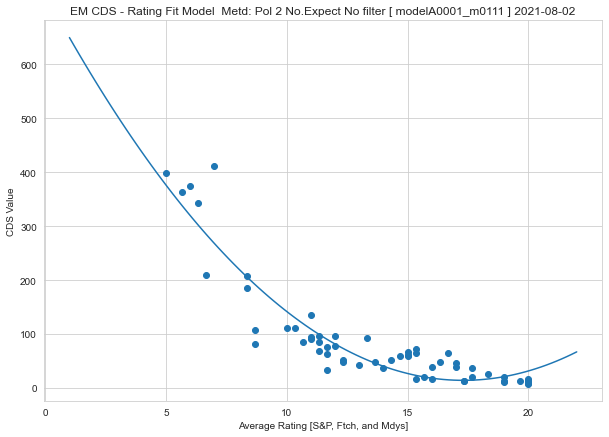

<Figure size 432x288 with 0 Axes>

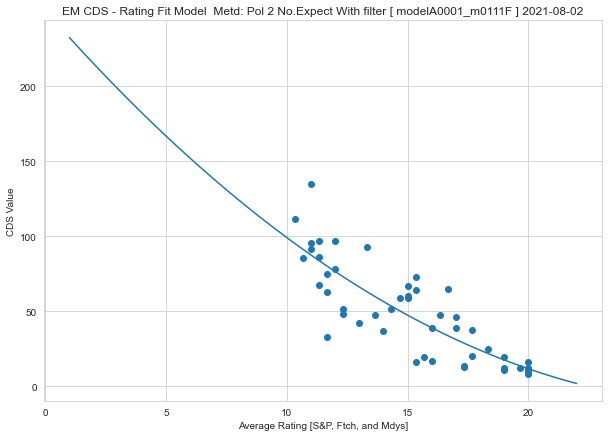

<Figure size 432x288 with 0 Axes>

complete!!!!


In [60]:
#first batch
#polinomica binomial sin constante, 
#countries no filter, 
#average rating
#latest cds

########update!--------------
name='modelA0001_m0111'
methodology="Metd: Pol"
p_parameter=2
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')

fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)


#f['r_m0101']=(f['cds']-f['m0101'])
#r'K:\2020_2431\q\cds_report\images\rating_fit\A0001.pdf'
#base['modelA0002_m0111'] = mymodel(x)
#plt.savefig('summary0001.png', dpi=100)
#plt.savefig("summary0001.pdf", bbox_inches='tight')

#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name


########update!--------------
name='modelA0001_m0111F'
methodology="Metd: Pol"
p_parameter=2
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last


########update!--------------
x = base2.average_rating_n
y = base2.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name

print("complete!!!!")

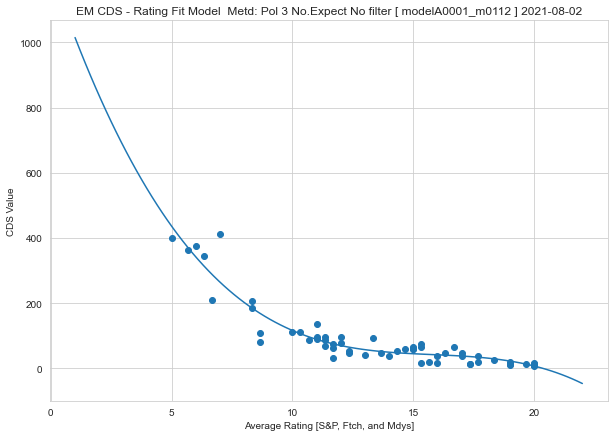

<Figure size 432x288 with 0 Axes>

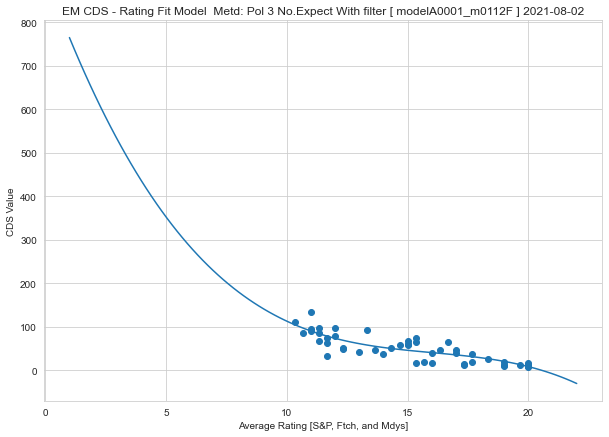

<Figure size 432x288 with 0 Axes>

complete!!!!


In [61]:
#polinomica binomial sin constante, (3)
#countries no filter, 
#average rating
#latest cds

########update!--------------
name='modelA0001_m0112'
methodology="Metd: Pol"
p_parameter=3
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)

#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name




########update!--------------
name='modelA0001_m0112F'
methodology="Metd: Pol"
p_parameter=3
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last



########update!--------------
x = base2.average_rating_n
y = base2.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name

print("complete!!!!")




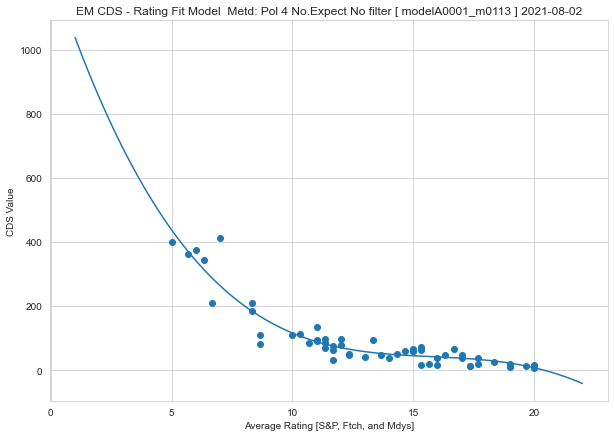

<Figure size 432x288 with 0 Axes>

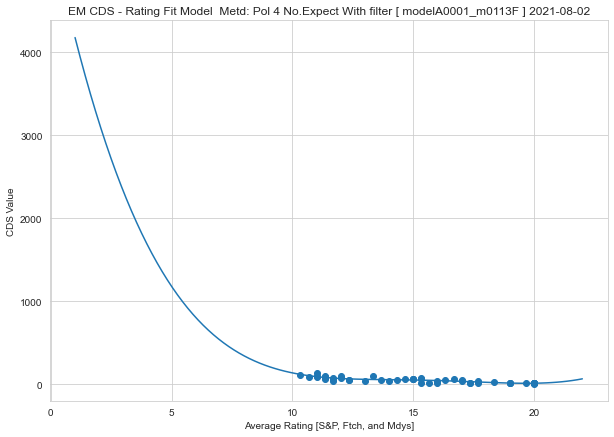

<Figure size 432x288 with 0 Axes>

Complete


In [62]:
#polinomica binomial sin constante, (4)
#countries no filter, 
#average rating
#latest cds

########update!--------------
name='modelA0001_m0113'
methodology="Metd: Pol"
p_parameter=4
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)




#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name





########update!--------------
name='modelA0001_m0113F'
methodology="Metd: Pol"
p_parameter=4
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last



########update!--------------
x = base2.average_rating_n
y = base2.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name






print("Complete")

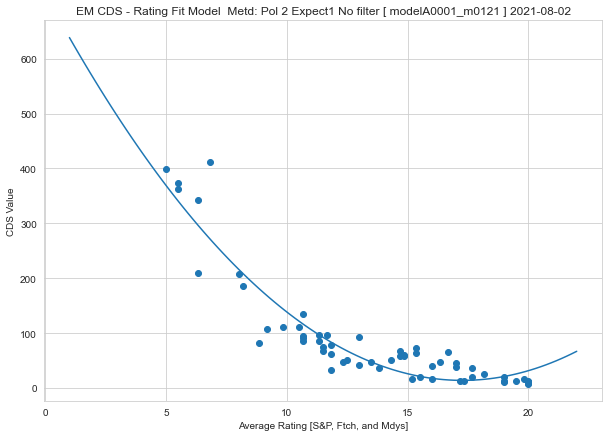

<Figure size 432x288 with 0 Axes>

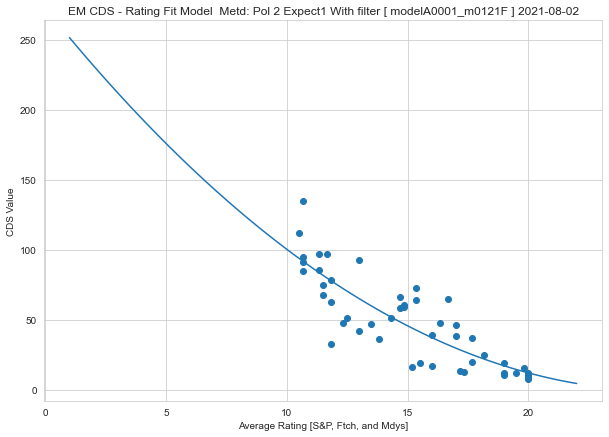

<Figure size 432x288 with 0 Axes>

Complete


In [64]:
#second batch
#polinomica binomial sin constante, 
#countries no filter, 
#average rating + outlook/0.5
#latest cds


########update!--------------
name='modelA0001_m0121'
methodology="Metd: Pol"
p_parameter=2
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="Expect1"
########---------------------
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n_ef0
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)




#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name




########update!--------------
name='modelA0001_m0121F'
methodology="Metd: Pol"
p_parameter=2
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="Expect1"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last


########update!--------------
x = base2.average_rating_n_ef0
y = base2.cds_latest
########---------------------




mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name






print("Complete")




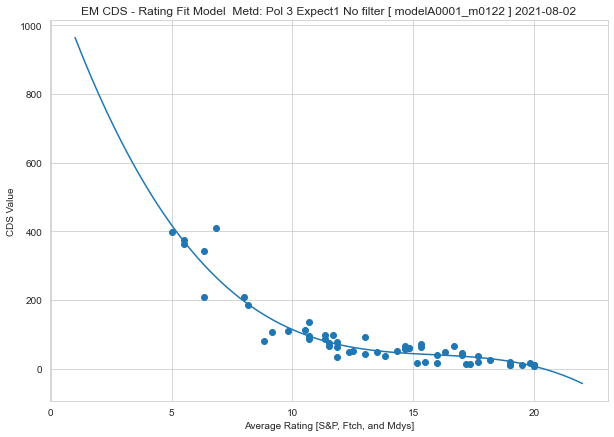

<Figure size 432x288 with 0 Axes>

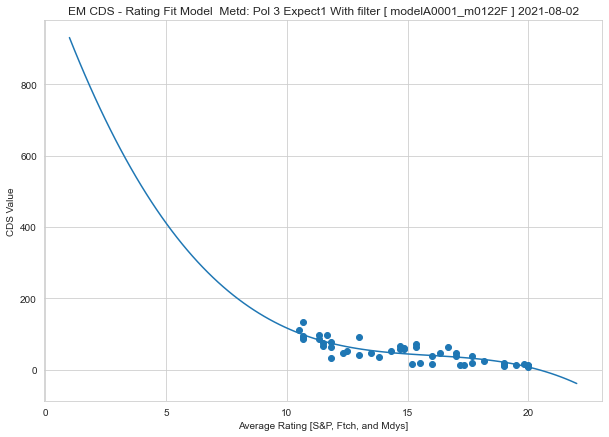

<Figure size 432x288 with 0 Axes>

Complete


In [65]:
#second batch
#polinomica binomial sin constante, 
#countries no filter, 
#average rating + outlook/0.5
#latest cds


########update!--------------
name='modelA0001_m0122'
methodology="Metd: Pol"
p_parameter=3
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="Expect1"
########---------------------
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n_ef0
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)


#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name




########update!--------------
name='modelA0001_m0122F'
methodology="Metd: Pol"
p_parameter=3
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="Expect1"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last


########update!--------------
x = base2.average_rating_n_ef0
y = base2.cds_latest
########---------------------



mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name


print("Complete")



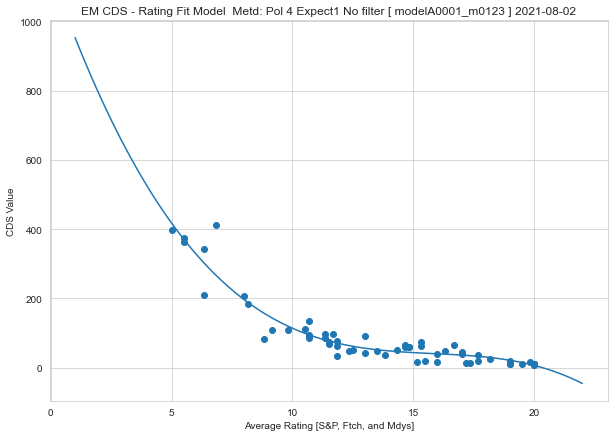

<Figure size 432x288 with 0 Axes>

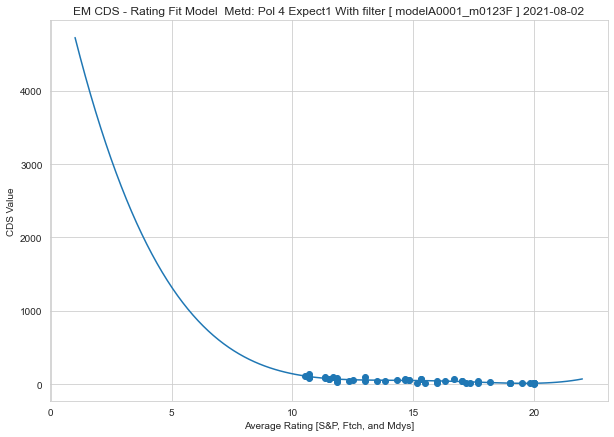

<Figure size 432x288 with 0 Axes>

Complete


In [66]:
#second batch
#polinomica binomial sin constante,  4
#countries no filter, 
#average rating + outlook/0.5
#latest cds



########update!--------------
name='modelA0001_m0123'
methodology="Metd: Pol"
p_parameter=4
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="Expect1"
########---------------------
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n_ef0
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)





#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name


########update!--------------
name='modelA0001_m0123F'
methodology="Metd: Pol"
p_parameter=4
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="Expect1"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last




########update!--------------
x = base2.average_rating_n_ef0
y = base2.cds_latest
########---------------------



mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name


print("Complete")






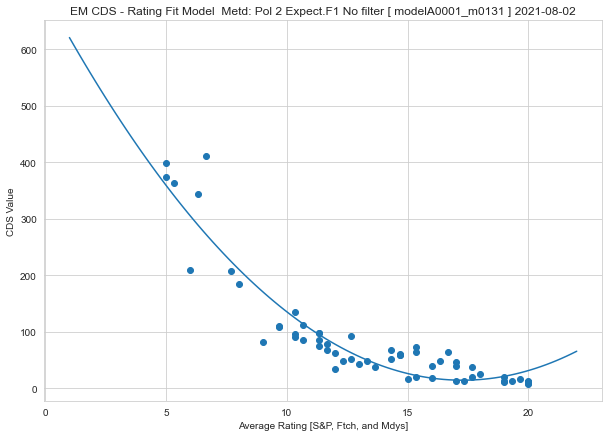

<Figure size 432x288 with 0 Axes>

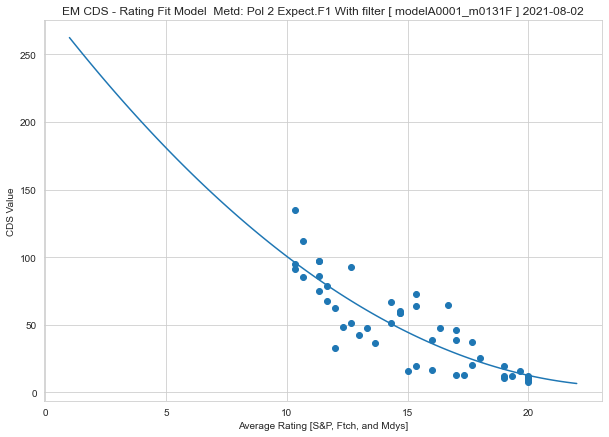

<Figure size 432x288 with 0 Axes>

Complete


In [68]:
#third batch
#polinomica binomial sin constante, 
#countries no filter, 
#average rating + outlook*1
#latest cds


########update!--------------
name='modelA0001_m0131'
methodology="Metd: Pol"
p_parameter=2
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="Expect.F1"
########---------------------
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n_ef1
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)



#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name





########update!--------------
name='modelA0001_m0131F'
methodology="Metd: Pol"
p_parameter=2
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="Expect.F1"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last




########update!--------------
x = base2.average_rating_n_ef1
y = base2.cds_latest
########---------------------




mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name


print("Complete")



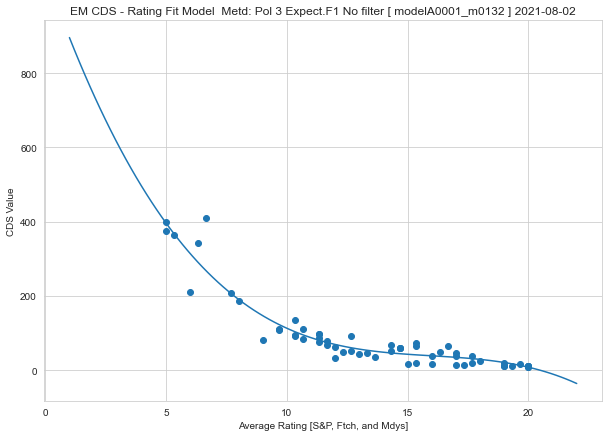

<Figure size 432x288 with 0 Axes>

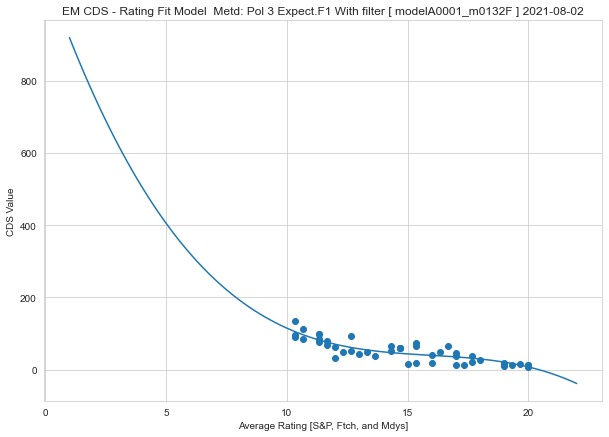

<Figure size 432x288 with 0 Axes>

Complete


In [69]:
#third batch
#polinomica binomial sin constante, 
#countries no filter, 
#average rating + outlook*1
#latest cds

########update!--------------
name='modelA0001_m0132'
methodology="Metd: Pol"
p_parameter=3
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="Expect.F1"
########---------------------
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n_ef1
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)


###########################################################################

#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name





########update!--------------
name='modelA0001_m0132F'
methodology="Metd: Pol"
p_parameter=3
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="Expect.F1"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last




########update!--------------
x = base2.average_rating_n_ef1
y = base2.cds_latest
########---------------------




mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name


print("Complete")




##


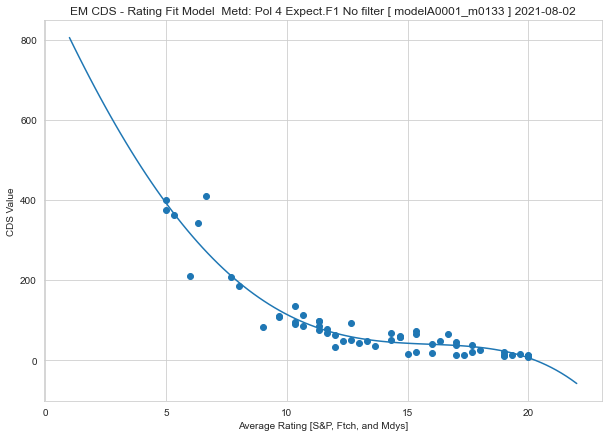

<Figure size 432x288 with 0 Axes>

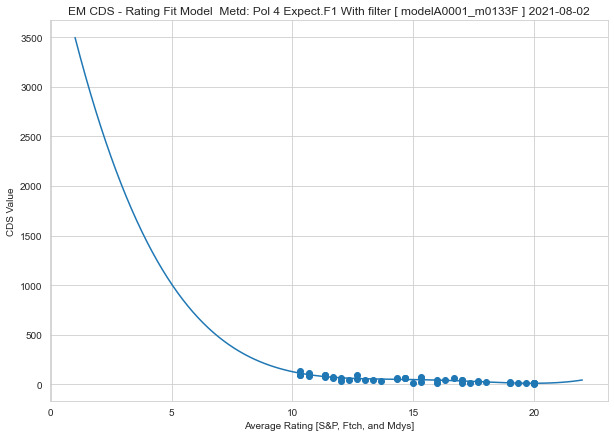

<Figure size 432x288 with 0 Axes>

Complete


In [70]:
#third batch
#polinomica binomial sin constante, 4
#countries no filter, 
#average rating + outlook*1
#latest cds

########update!--------------
name='modelA0001_m0133'
methodology="Metd: Pol"
p_parameter=4
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="Expect.F1"
########---------------------
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name

########update!--------------
x = base.average_rating_n_ef1
y = base.cds_latest
########---------------------

mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(location, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base['new_column'] = mymodel(x)
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)




#2 #########filter ################################
del mymodel
del myline
del fig_m0001
del x 
del y 
del name
del r_name





########update!--------------
name='modelA0001_m0133F'
methodology="Metd: Pol"
p_parameter=4
########---------------------
###filter name
rf_name="rf_"+name
namef=str(name)
#####
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="Expect.F1"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last



########update!--------------
x = base2.average_rating_n_ef1
y = base2.cds_latest
########---------------------




mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
myline = numpy.linspace(1, 22, 100)
plt.figure(figsize=(parameter1,parameter2))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
#fig = plt.figure()
plt.title(str(title_text))
plt.xlabel(str(x_label))
plt.ylabel(str(y_label))
plt.savefig(locationf, bbox_inches='tight')
fig_m0001 = plt.figure()
plt.show()


base2['new_column'] = mymodel(x)
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)

del mymodel
del myline
del fig_m0001
del x 
del y 
del namef
del rf_name


print("Complete")




##



In [22]:
#apply fiulters of countries




In [23]:
#create plot original of latest
# create table to see differnece, charts table
#for each mdoel a graph witht eh basoles and the resuduls
#create chjart of orignal wiht labels annd ht eimpleid model
#creeate final grpah with all models resutls
#generate  max, min , average, medinad, and then do the residual, adn then do agians charts grpajhs.


#f['r_m0101']=(f['cds']-f['m0101'])

#print(base)
#base.to_clipboard(excel = True)

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  ...  \
0          S

In [ ]:
#parameters
graphWidth = 800
graphHeight = 600


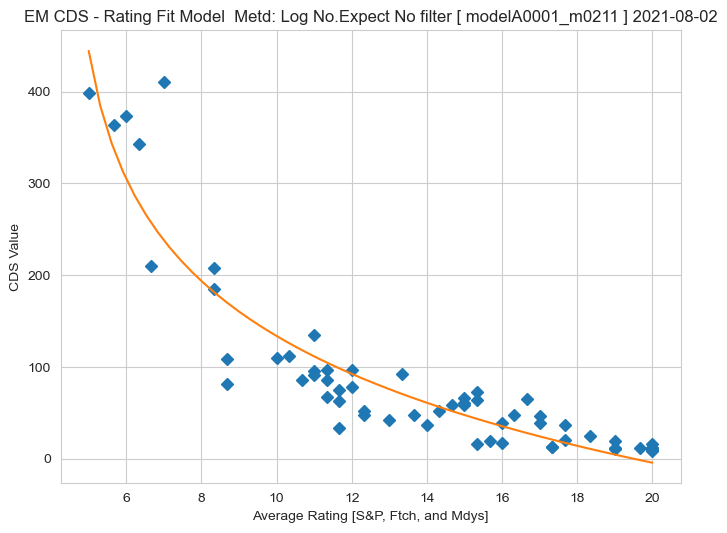

<Figure size 432x288 with 0 Axes>

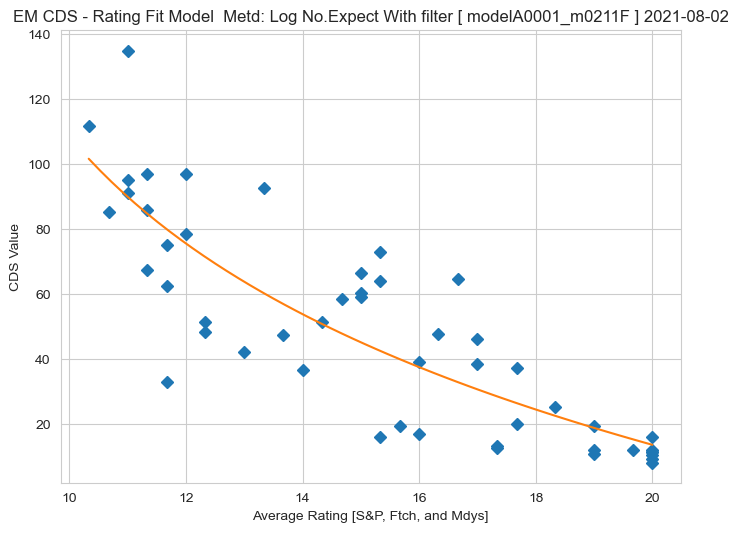

<Figure size 432x288 with 0 Axes>

Complete


In [84]:
#first  batch
#logaritmic sin constante, 
#countries no filter, 
#average rating 
#latest cds

########update!--------------
name='modelA0001_m0211'
methodology="Metd: Log"
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name
########update!--------------
x = base.average_rating_n
y = base.cds_latest
########---------------------

# alias data to match previous example
xData = numpy.array(x, dtype=float)
yData = numpy.array(y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData

#SE = numpy.square(absError) # squared errors
#MSE = numpy.mean(SE) # mean squared errors
#RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
#Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

#print('Parameters:', fittedParameters)
#print('RMSE:', RMSE)
#print('R-squared:', Rsquared)
#print(modelPredictions)

base['new_column'] = func(xData, *fittedParameters) 
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)





##########################################################
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.title(str(title_text))
    plt.xlabel(str(x_label))
    plt.ylabel(str(y_label))
    plt.savefig(location, bbox_inches='tight')
    plt.savefig("A0101.pdf", bbox_inches='tight')
    fig_m0101 = plt.figure()
    plt.show()
    plt.close('all') # clean up after using pyplot

ModelAndScatterPlot(graphWidth, graphHeight)




#2 #########filter ################################
del ModelAndScatterPlot
del x 
del y 
del xData
del yData
del name
del r_name


########update!--------------
name='modelA0001_m0211F'
methodology="Metd: Log"
########---------------------
rf_name="rf_"+name
namef=str(name)
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last
r_name="r_"+name
########update!--------------
x = base2.average_rating_n
y = base2.cds_latest
########---------------------



# alias data to match previous example
xData = numpy.array(x, dtype=float)
yData = numpy.array(y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData



base2['new_column'] = func(xData, *fittedParameters) 
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)





##########################################################
##########################################################
# graphics output section
def ModelAndScatterPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.title(str(title_text))
    plt.xlabel(str(x_label))
    plt.ylabel(str(y_label))
    plt.savefig(locationf, bbox_inches='tight')
    plt.savefig("A0101.pdf", bbox_inches='tight')
    fig_m0101 = plt.figure()
    plt.show()
    plt.close('all') # clean up after using pyplot

ModelAndScatterPlot2(graphWidth, graphHeight)


del ModelAndScatterPlot2
del x 
del y 
del xData
del yData
del namef
del rf_name


print("Complete")




##



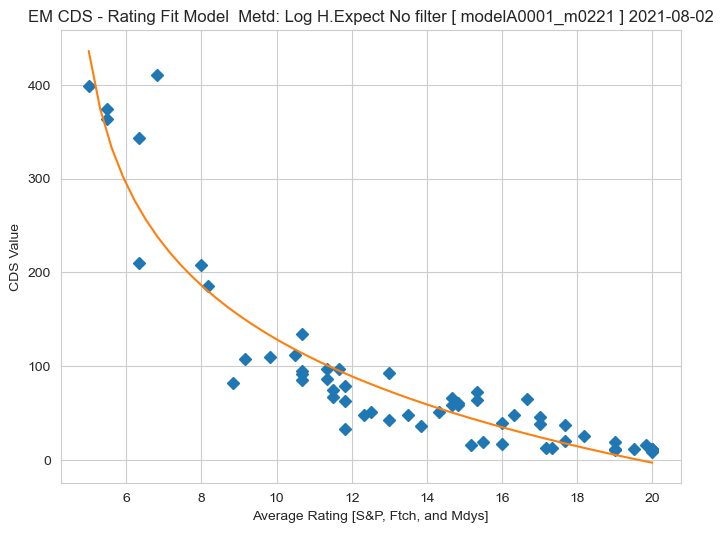

<Figure size 432x288 with 0 Axes>

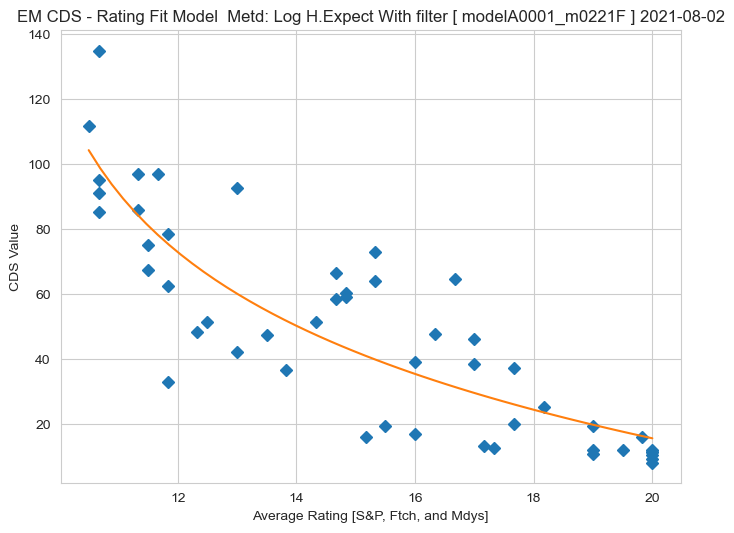

<Figure size 432x288 with 0 Axes>

Complete


In [85]:
#second batch
#polinomica binomial sin constante, 
#countries no filter, 
#average rating + outlook/0.5 . H EXPECTATION
#latest cds




########update!--------------
name='modelA0001_m0221'
methodology="Metd: Log"
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name
########update!--------------
x = base.average_rating_n_ef0
y = base.cds_latest
########---------------------

# alias data to match previous example
xData = numpy.array(x, dtype=float)
yData = numpy.array(y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData

#SE = numpy.square(absError) # squared errors
#MSE = numpy.mean(SE) # mean squared errors
#RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
#Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

#print('Parameters:', fittedParameters)
#print('RMSE:', RMSE)
#print('R-squared:', Rsquared)
#print(modelPredictions)

base['new_column'] = func(xData, *fittedParameters) 
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)




##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.title(str(title_text))
    plt.xlabel(str(x_label))
    plt.ylabel(str(y_label))
    plt.savefig(location, bbox_inches='tight')
    plt.savefig("A0101.pdf", bbox_inches='tight')
    fig_m0101 = plt.figure()
    plt.show()
    plt.close('all') # clean up after using pyplot

ModelAndScatterPlot(graphWidth, graphHeight)








#2 #########filter ################################
del ModelAndScatterPlot
del x 
del y 
del xData
del yData
del name
del r_name


########update!--------------
name='modelA0001_m0221F'
methodology="Metd: Log"
########---------------------
rf_name="rf_"+name
namef=str(name)
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last
r_name="r_"+name
########update!--------------
x = base2.average_rating_n_ef0
y = base2.cds_latest
########---------------------



# alias data to match previous example
xData = numpy.array(x, dtype=float)
yData = numpy.array(y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData



base2['new_column'] = func(xData, *fittedParameters) 
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)





##########################################################
##########################################################
# graphics output section
def ModelAndScatterPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.title(str(title_text))
    plt.xlabel(str(x_label))
    plt.ylabel(str(y_label))
    plt.savefig(locationf, bbox_inches='tight')
    plt.savefig("A0101.pdf", bbox_inches='tight')
    fig_m0101 = plt.figure()
    plt.show()
    plt.close('all') # clean up after using pyplot

ModelAndScatterPlot2(graphWidth, graphHeight)


del ModelAndScatterPlot2
del x 
del y 
del xData
del yData
del namef
del rf_name


print("Complete")




##


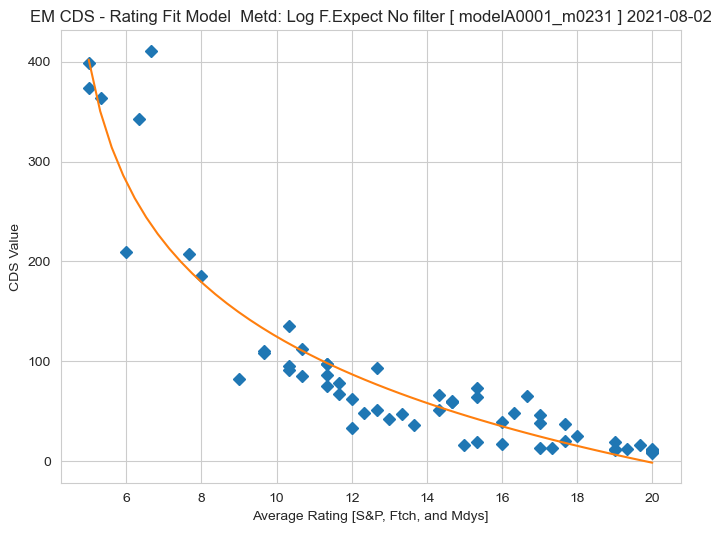

<Figure size 432x288 with 0 Axes>

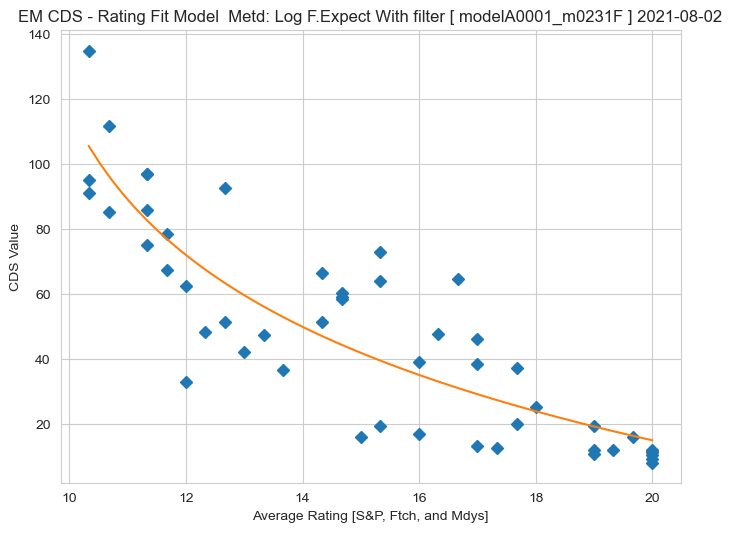

<Figure size 432x288 with 0 Axes>

Complete


In [86]:
#third batch
#polinomica binomial sin constante, 
#countries no filter, 
#average rating + outlook*1
#latest cds


########update!--------------
name='modelA0001_m0231'
methodology="Metd: Log"
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="F.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name
########update!--------------
x = base.average_rating_n_ef1
y = base.cds_latest
########---------------------

# alias data to match previous example
xData = numpy.array(x, dtype=float)
yData = numpy.array(y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData

#SE = numpy.square(absError) # squared errors
#MSE = numpy.mean(SE) # mean squared errors
#RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
#Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

#print('Parameters:', fittedParameters)
#print('RMSE:', RMSE)
#print('R-squared:', Rsquared)
#print(modelPredictions)

base['new_column'] = func(xData, *fittedParameters) 
########update!--------------
base['r_new_column'] = base['new_column']-base['cds_latest']
########---------------------
base.rename(columns={'new_column':str(name)}, inplace=True)
base.rename(columns={'r_new_column':str(r_name)}, inplace=True)




##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.title(str(title_text))
    plt.xlabel(str(x_label))
    plt.ylabel(str(y_label))
    plt.savefig(location, bbox_inches='tight')
    plt.savefig("A0101.pdf", bbox_inches='tight')
    fig_m0101 = plt.figure()
    plt.show()
    plt.close('all') # clean up after using pyplot

ModelAndScatterPlot(graphWidth, graphHeight)




#2 #########filter ################################
del ModelAndScatterPlot
del x 
del y 
del xData
del yData
del name
del r_name


########update!--------------
name='modelA0001_m0231F'
methodology="Metd: Log"
########---------------------
rf_name="rf_"+name
namef=str(name)
variable_text='latest CDS market value'
filter_text ="With filter"
expectation_text="F.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
locationf=location_first+namef+location_last
r_name="r_"+name
########update!--------------
x = base2.average_rating_n_ef1
y = base2.cds_latest
########---------------------




# alias data to match previous example
xData = numpy.array(x, dtype=float)
yData = numpy.array(y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData



base2['new_column'] = func(xData, *fittedParameters) 
########update!--------------
base2['r_new_column'] = base2['new_column']-base2['cds_latest']
########---------------------
base2.rename(columns={'new_column':str(namef)}, inplace=True)
base2.rename(columns={'r_new_column':str(rf_name)}, inplace=True)





##########################################################
##########################################################
# graphics output section
def ModelAndScatterPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.title(str(title_text))
    plt.xlabel(str(x_label))
    plt.ylabel(str(y_label))
    plt.savefig(locationf, bbox_inches='tight')
    plt.savefig("A0101.pdf", bbox_inches='tight')
    fig_m0101 = plt.figure()
    plt.show()
    plt.close('all') # clean up after using pyplot

ModelAndScatterPlot2(graphWidth, graphHeight)


del ModelAndScatterPlot2
del x 
del y 
del xData
del yData
del namef
del rf_name


print("Complete")




##





In [27]:
#asdasdads
#K:\2020_2431\q\cds_report\images\rating_fit
    
    
#part 3 pdf ALL COUNTRUES
os.chdir('K:/2020_2431/q/cds_report/images/rating_fit')
print(os.getcwd())

    
final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\rating_fit\\report_m\\002")
final_location_last = '.pdf'
####SERIES 110  

#cds  #######
list_im = ["modelA0001_m0111_fig.jpg","modelA0001_m0112_fig.jpg","modelA0001_m0113_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save("modelA0001_m0110s_fig")   

del list_im
del imgs
del min_shape
del imgs_comb

list_im = ["modelA0001_m0111_fig.jpg","modelA0001_m0112_fig.jpg","modelA0001_m0113_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save("modelA0001_m0110s_fig")   





#cds  #######
list_im = ["modelA0001_m0111_fig.jpg","modelA0001_m0112_fig.jpg","modelA0001_m0113_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( "modelA0001_m0110s_fig") )    






####SERIES 110  

#cds  #######
list_im = ["modelA0001_m0111_fig.jpg","modelA0001_m0112_fig.jpg","modelA0001_m0113_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0110s_fig"+final_location_last) )    

####SERIES 120
    
#cds  #######
list_im = ["modelA0001_m0121_fig.jpg","modelA0001_m0122_fig.jpg","modelA0001_m0123_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0120s_fig"+final_location_last) )    
    
####SERIES 130
        
#cds  #######
list_im = ["modelA0001_m0131_fig.jpg","modelA0001_m0132_fig.jpg","modelA0001_m0133_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0130s_fig"+final_location_last) )    
    
####SERIES 210
    
#cds  #######
list_im = ["modelA0001_m0211_fig.jpg","modelA0001_m0221_fig.jpg","modelA0001_m0231_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0200s_fig"+final_location_last) )    

print("Complete!!!")





    list_im = [str("fig_d_"+country+"_1.jpg"),str("fig_d_"+country+"_2.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

    # save that beautiful picture
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( str("fig_d_"+country+".pdf") ) 
    imgs_comb.save( str(final_location_first+country+final_location_last) ) 




K:\2020_2431\q\cds_report\images\rating_fit


In [28]:
#Corss country comparison
print(base.columns.tolist())
base_em=base[base.em_dummy==1]
base_em=base_em.reset_index(drop=True)
#print(base_em)


title_graph="EM CDS - Rating Fit Model "
c_label="EM Country"
y_label="CDS Value"


#file location
location_first= ("K:\\2020_2431\\q\\cds_report\\images\\rating_fit\\")
today = str(date.today())+"_"
location_last = '_fig.jpg'
residual="Residual"

#print(df1)
print("Complete!!!")

['country', 'ticker', 'rating_moodys', 'rating_sp', 'rating_fitch', 'outlook_moodys', 'outlook_sp', 'outlook_fitch', 'cds_latest', 'cds_5d', 'cds_30d', 'cds_90', 'em_dummy', 'region001', 'region002', 'region003', 'moodys_rating_n', 'fitch_rating_n', 'sp_rating_n', 'outlook_fitch_n', 'outlook_moodys_n', 'outlook_sp_n', 'moodys_ig_d', 'fitch_ig_d', 'sp_ig_d', 'average_rating_n', 'moodys_rating_n_ef0', 'fitch_rating_n_ef0', 'sp_rating_n_ef0', 'average_rating_n_ef0', 'moodys_rating_n_ef1', 'fitch_rating_n_ef1', 'sp_rating_n_ef1', 'average_rating_n_ef1', 'modelA0001_m0111', 'r_modelA0001_m0111', 'modelA0001_m0112', 'r_modelA0001_m0112', 'modelA0001_m0113', 'r_modelA0001_m0113', 'modelA0001_m0121', 'r_modelA0001_m0121', 'modelA0001_m0122', 'r_modelA0001_m0122', 'modelA0001_m0123', 'r_modelA0001_m0123', 'modelA0001_m0131', 'r_modelA0001_m0131', 'modelA0001_m0132', 'r_modelA0001_m0132', 'modelA0001_m0133', 'r_modelA0001_m0133', 'modelA0001_m0211', 'r_modelA0001_m0211', 'modelA0001_m0221', 'r_m

    order         country  order_1
0       5          Turkey       10
1       7    South Africa       20
2       0          Brazil       30
3       1        Colombia       40
4       6          Russia       50
5       2          Mexico       60
6       4            Peru       70
7      14       Indonesia       80
8       9         Hungary       90
9       3           Chile      100
10      8          Poland      110
11     16     Philippines      120
12     10          Israel      130
13     15        Malaysia      140
14     17        Thailand      150
15     13           China      160
16     11  Czech Republic      170
17     12           Korea      180
   order        order_sort  order_2
0      1        cds_latest        1
1      2  modelA0001_m0111        2
2      3  modelA0001_m0112        3
3      4  modelA0001_m0113        4
           country            Status      Values        order_sort  order_3
20          Turkey        cds_latest  410.889771        cds_latest       10
28 

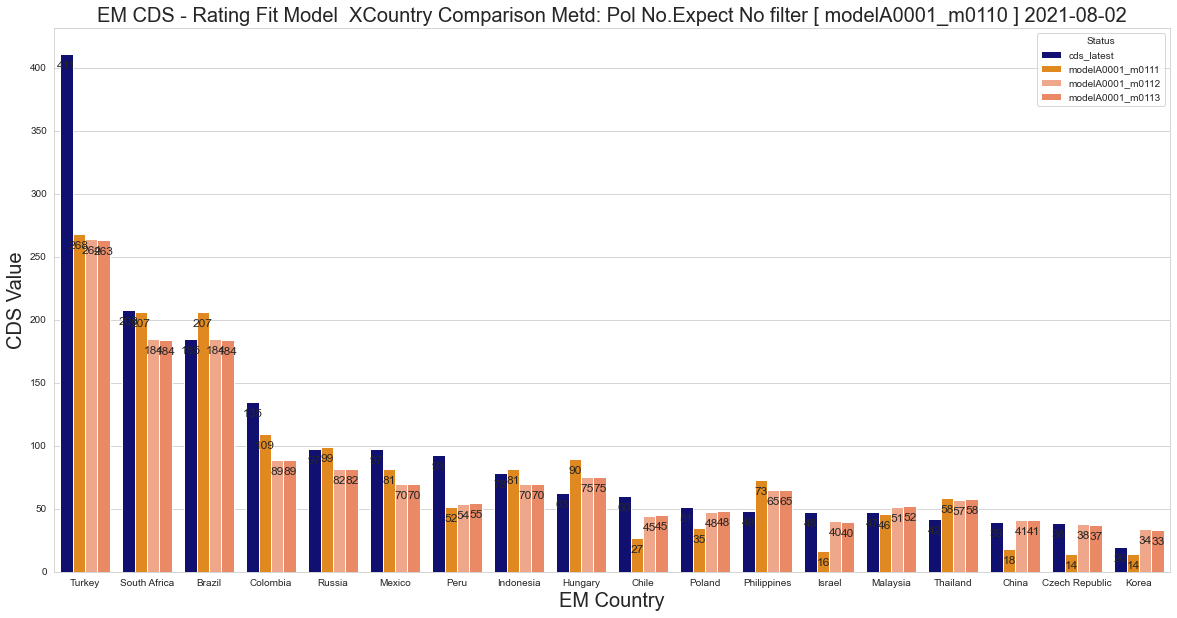

    order         country  order_1
0      16     Philippines       10
1       9         Hungary       20
2      17        Thailand       30
3      12           Korea       40
4       0          Brazil       50
5      15        Malaysia       60
6      14       Indonesia       70
7      13           China       80
8       8          Poland       90
9      11  Czech Republic      100
10      6          Russia      110
11     10          Israel      120
12      7    South Africa      130
13      3           Chile      140
14      2          Mexico      150
15      4            Peru      160
16      1        Colombia      170
17      5          Turkey      180
   index  order          order_sort  order_2
0      3      4             average        1
1      2      3  r_modelA0001_m0113        2
2      1      2  r_modelA0001_m0112        3
3      0      1  r_modelA0001_m0111        4
        country              Status      Values          order_sort  order_3
67  Philippines             avera

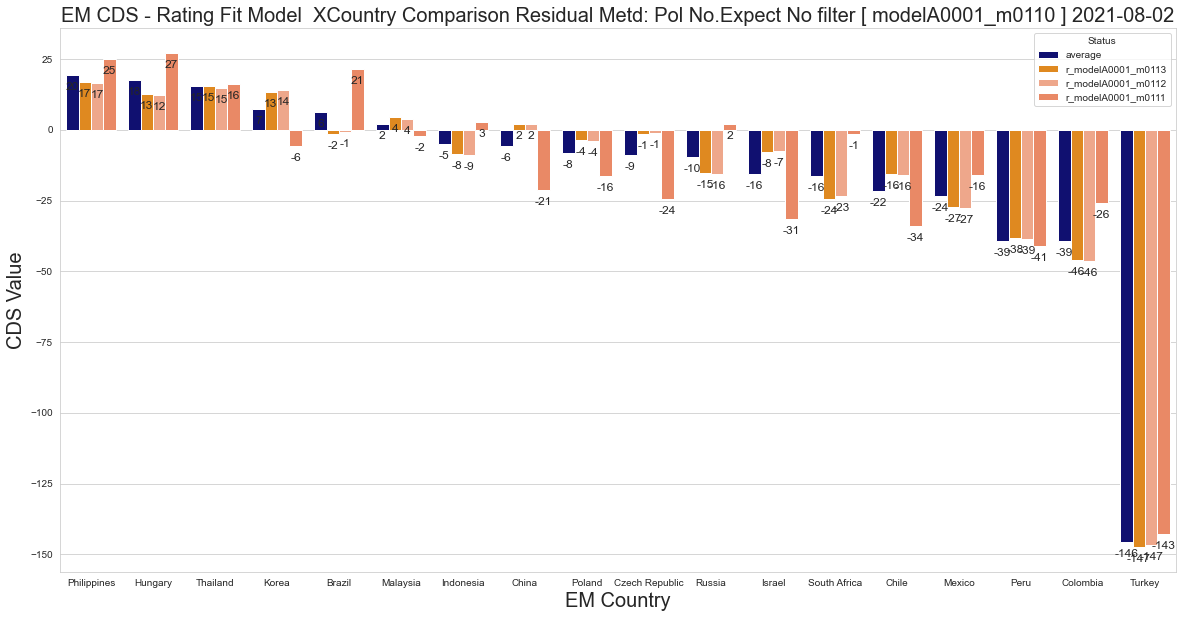

Complete!!!


In [29]:

##model 1 poli | all counntries nf | cds latest | rating x2x3x4
#part1
########update!--------------
chart=base_em[['country','cds_latest','modelA0001_m0111','modelA0001_m0112','modelA0001_m0113']]
order_t=base_em[['country','cds_latest']]
order_t = order_t.sort_values(['cds_latest'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['cds_latest']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)


########update!--------------
name='modelA0001_m0110'
methodology="Metd: Pol"
p_parameter=2
########---------------------
comparison="XCountry Comparison"
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()




#part2 Residual
########update!--------------
chart=base_em[['country','r_modelA0001_m0111','r_modelA0001_m0112','r_modelA0001_m0113']]
order_p=chart
order_p['average']=order_p[['r_modelA0001_m0111','r_modelA0001_m0112','r_modelA0001_m0113']].mean(axis=1)
order_t=order_p[['country','average']]
order_t = order_t.sort_values(['average'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['average']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
o_list = o_list.sort_values(['order_2'], ascending=[False])
o_list = o_list.reset_index()
o_list['order_2'] = (o_list.index + 1)

print(o_list)


########update!--------------
name='modelA0001_m0110'
methodology="Metd: Pol"
p_parameter=2
########---------------------
comparison="XCountry Comparison"
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+residual+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()

print("Complete!!!")

    order         country  order_1
0       5          Turkey       10
1       7    South Africa       20
2       0          Brazil       30
3       1        Colombia       40
4       6          Russia       50
5       2          Mexico       60
6       4            Peru       70
7      14       Indonesia       80
8       9         Hungary       90
9       3           Chile      100
10      8          Poland      110
11     16     Philippines      120
12     10          Israel      130
13     15        Malaysia      140
14     17        Thailand      150
15     13           China      160
16     11  Czech Republic      170
17     12           Korea      180
   order        order_sort  order_2
0      1        cds_latest        1
1      2  modelA0001_m0121        2
2      3  modelA0001_m0122        3
3      4  modelA0001_m0123        4
           country            Status      Values        order_sort  order_3
20          Turkey        cds_latest  410.889771        cds_latest       10
28 

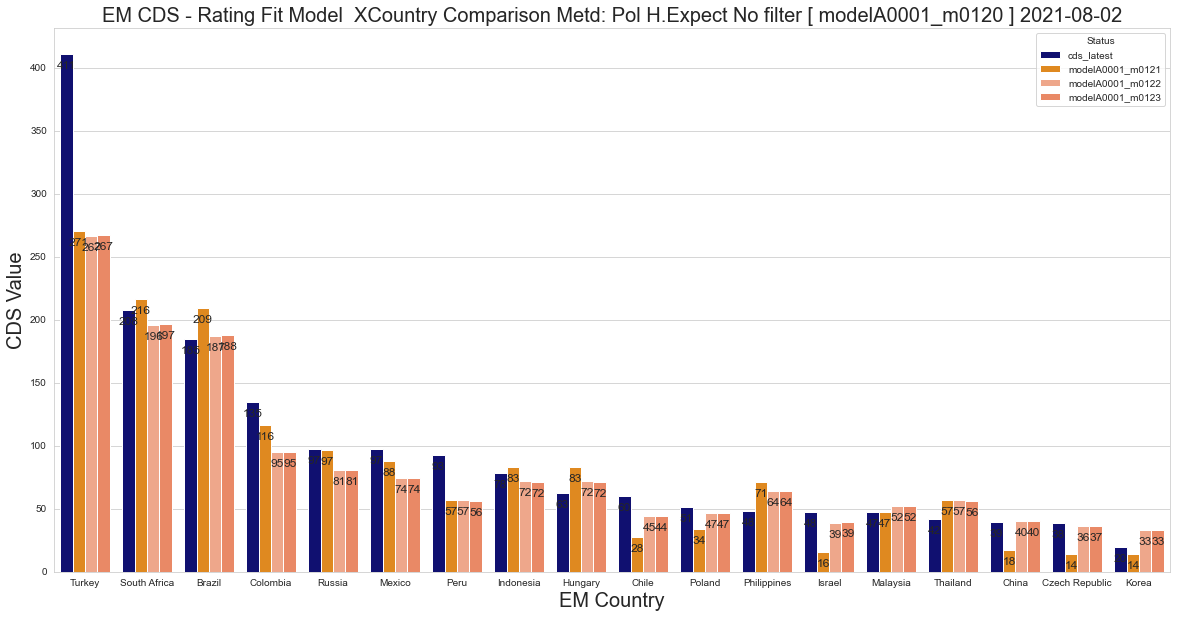

    order         country  order_1
0      16     Philippines       10
1      17        Thailand       20
2       9         Hungary       30
3       0          Brazil       40
4      12           Korea       50
5      15        Malaysia       60
6      14       Indonesia       70
7       7    South Africa       80
8      13           China       90
9       8          Poland      100
10     11  Czech Republic      110
11      6          Russia      120
12     10          Israel      130
13      2          Mexico      140
14      3           Chile      150
15      1        Colombia      160
16      4            Peru      170
17      5          Turkey      180
   index  order          order_sort  order_2
0      3      4             average        1
1      2      3  r_modelA0001_m0123        2
2      1      2  r_modelA0001_m0122        3
3      0      1  r_modelA0001_m0121        4
        country              Status      Values          order_sort  order_3
67  Philippines             avera

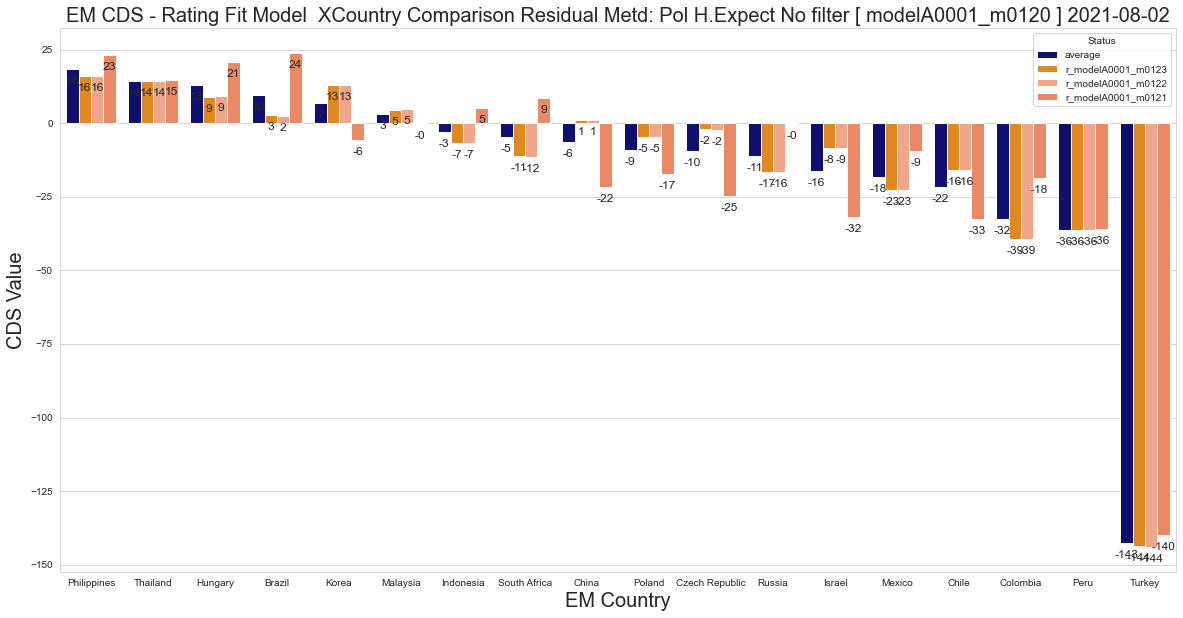

Complete!!!


In [30]:
#m0120 ** adding half expectaitons
#model 1 poli | all counntries|  cds latest |  rating + outlook/0.5 x2x3x4



#part1
########update!--------------
chart=base_em[['country','cds_latest','modelA0001_m0121','modelA0001_m0122','modelA0001_m0123']]
order_t=base_em[['country','cds_latest']]
order_t = order_t.sort_values(['cds_latest'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['cds_latest']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)


########update!--------------
name='modelA0001_m0120'
methodology="Metd: Pol"
p_parameter=2
########---------------------
comparison="XCountry Comparison"
variable_text='latest CDS market value'
filter_text ="No filter"
########update!--------------
expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()




#part2 Residual
########update!--------------
chart=base_em[['country','r_modelA0001_m0121','r_modelA0001_m0122','r_modelA0001_m0123']]
order_p=chart
order_p['average']=order_p[['r_modelA0001_m0121','r_modelA0001_m0122','r_modelA0001_m0123']].mean(axis=1)
order_t=order_p[['country','average']]
order_t = order_t.sort_values(['average'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['average']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
o_list = o_list.sort_values(['order_2'], ascending=[False])
o_list = o_list.reset_index()
o_list['order_2'] = (o_list.index + 1)

print(o_list)


########update!--------------
name='modelA0001_m0120'
methodology="Metd: Pol"
p_parameter=2
########---------------------
comparison="XCountry Comparison"
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+residual+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()
print("Complete!!!")

    order         country  order_1
0       5          Turkey       10
1       7    South Africa       20
2       0          Brazil       30
3       1        Colombia       40
4       6          Russia       50
5       2          Mexico       60
6       4            Peru       70
7      14       Indonesia       80
8       9         Hungary       90
9       3           Chile      100
10      8          Poland      110
11     16     Philippines      120
12     10          Israel      130
13     15        Malaysia      140
14     17        Thailand      150
15     13           China      160
16     11  Czech Republic      170
17     12           Korea      180
   order        order_sort  order_2
0      1        cds_latest        1
1      2  modelA0001_m0131        2
2      3  modelA0001_m0132        3
3      4  modelA0001_m0133        4
           country            Status      Values        order_sort  order_3
20          Turkey        cds_latest  410.889771        cds_latest       10
28 

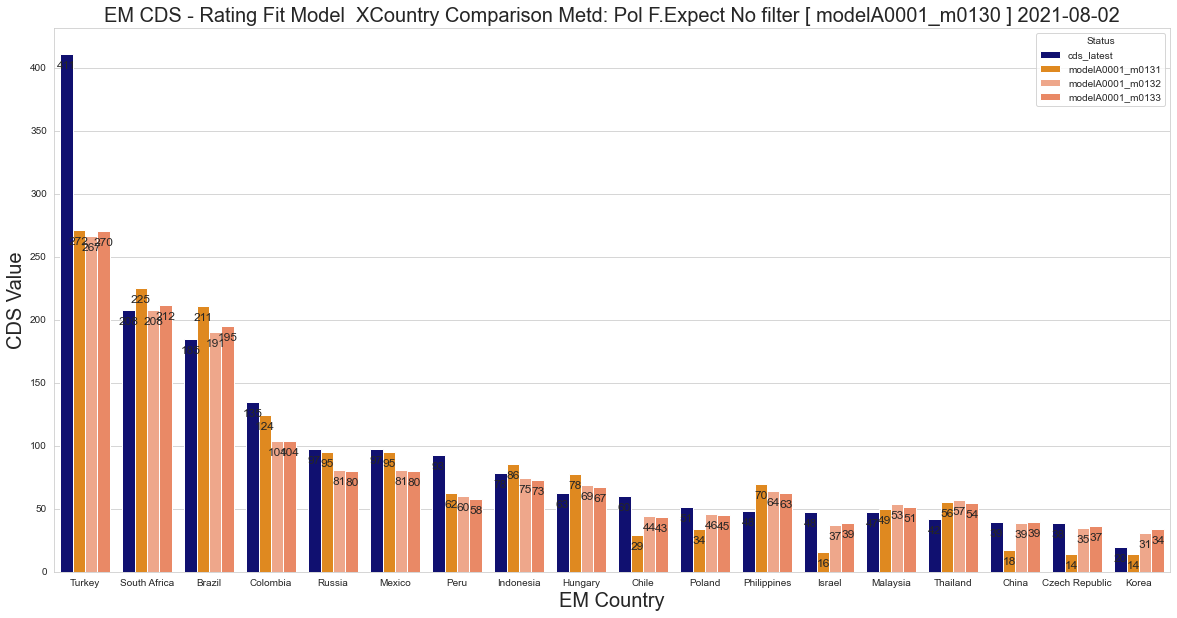

    order         country  order_1
0      16     Philippines       10
1       0          Brazil       20
2      17        Thailand       30
3       9         Hungary       40
4       7    South Africa       50
5      12           Korea       60
6      15        Malaysia       70
7      14       Indonesia       80
8      13           China       90
9       8          Poland      100
10     11  Czech Republic      110
11      2          Mexico      120
12      6          Russia      130
13     10          Israel      140
14      3           Chile      150
15      1        Colombia      160
16      4            Peru      170
17      5          Turkey      180
   index  order          order_sort  order_2
0      3      4             average        1
1      2      3  r_modelA0001_m0133        2
2      1      2  r_modelA0001_m0132        3
3      0      1  r_modelA0001_m0131        4
        country              Status      Values          order_sort  order_3
67  Philippines             avera

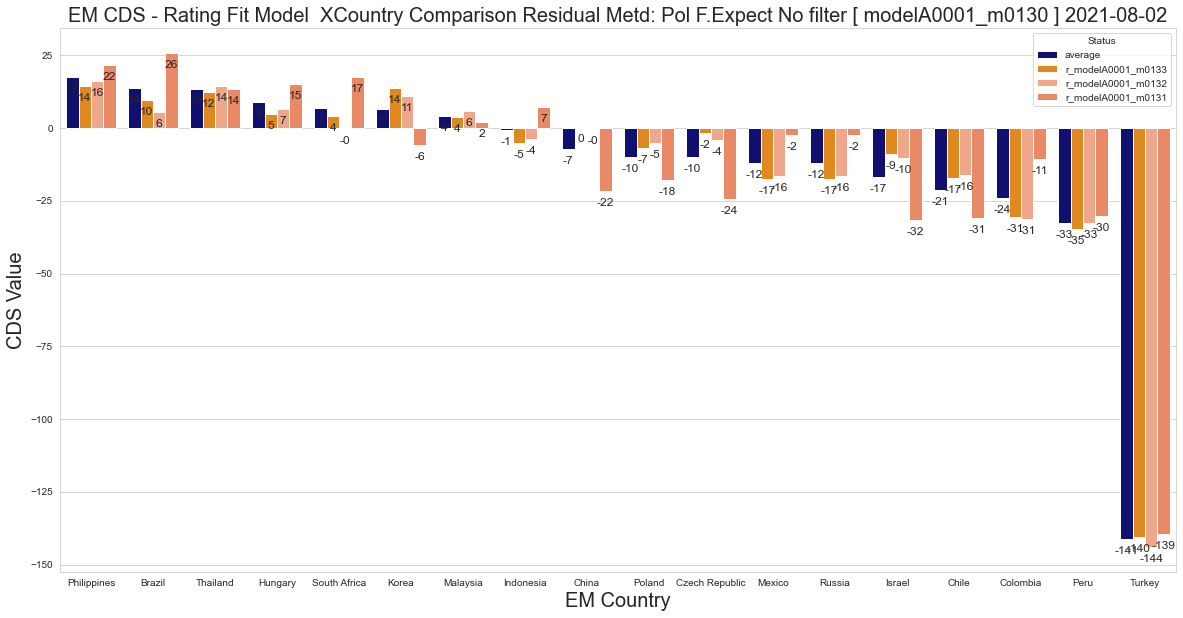

Complete!!!


In [31]:
#m0130
#model 1 poli | all counntries|  cds latest | rating + outlook*1 x2x3x4 
########update!--------------
name='modelA0001_m0130'
methodology="Metd: Pol"
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="F.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+today+name+location_last
r_name="r_"+name


#part1
########update!--------------
chart=base_em[['country','cds_latest','modelA0001_m0131','modelA0001_m0132','modelA0001_m0133']]
order_t=base_em[['country','cds_latest']]
order_t = order_t.sort_values(['cds_latest'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['cds_latest']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)


########update!--------------
name='modelA0001_m0130'
methodology="Metd: Pol"
########---------------------
comparison="XCountry Comparison"
variable_text='latest CDS market value'
filter_text ="No filter"
########update!--------------
expectation_text="F.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()




#part2 Residual
########update!--------------
chart=base_em[['country','r_modelA0001_m0131','r_modelA0001_m0132','r_modelA0001_m0133']]
order_p=chart
order_p['average']=order_p[['r_modelA0001_m0131','r_modelA0001_m0132','r_modelA0001_m0133']].mean(axis=1)
order_t=order_p[['country','average']]
order_t = order_t.sort_values(['average'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['average']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
o_list = o_list.sort_values(['order_2'], ascending=[False])
o_list = o_list.reset_index()
o_list['order_2'] = (o_list.index + 1)

print(o_list)


########update!--------------
name='modelA0001_m0130'
methodology="Metd: Pol"
p_parameter=2
########---------------------
comparison="XCountry Comparison"
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="F.Expect"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+residual+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()

print("Complete!!!")

    order         country  order_1
0       5          Turkey       10
1       7    South Africa       20
2       0          Brazil       30
3       1        Colombia       40
4       6          Russia       50
5       2          Mexico       60
6       4            Peru       70
7      14       Indonesia       80
8       9         Hungary       90
9       3           Chile      100
10      8          Poland      110
11     16     Philippines      120
12     10          Israel      130
13     15        Malaysia      140
14     17        Thailand      150
15     13           China      160
16     11  Czech Republic      170
17     12           Korea      180
   order        order_sort  order_2
0      1        cds_latest        1
1      2  modelA0001_m0211        2
           country            Status      Values        order_sort  order_3
10          Turkey        cds_latest  410.889771        cds_latest       10
14    South Africa        cds_latest  207.878586        cds_latest       20

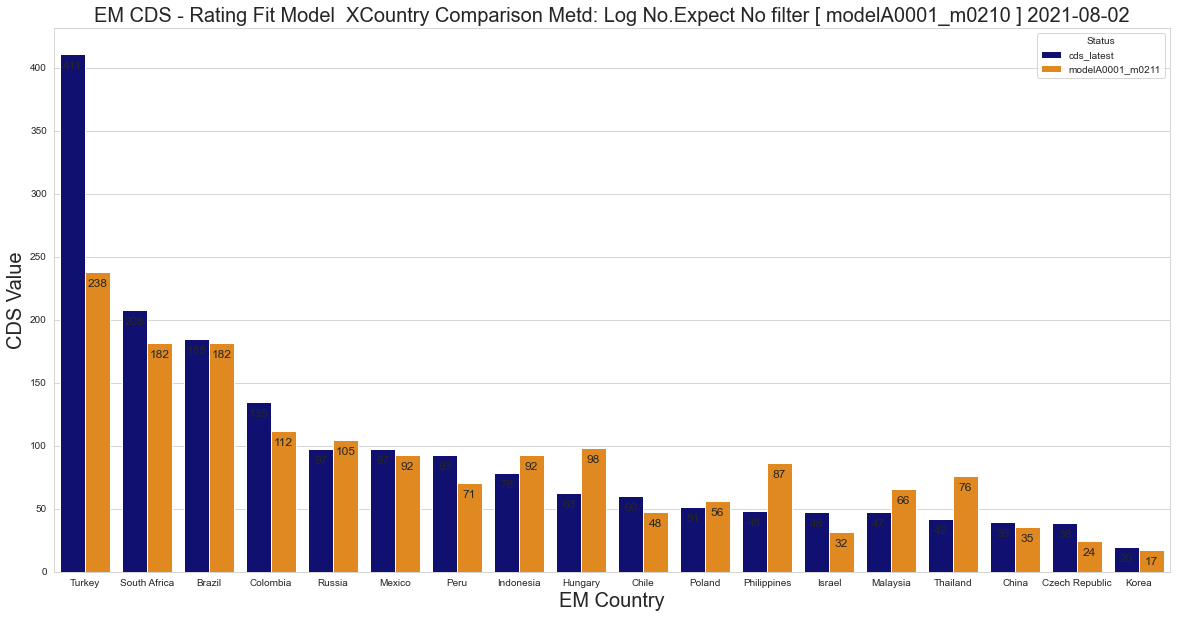

    order         country  order_1
0      16     Philippines       10
1       9         Hungary       20
2      17        Thailand       30
3      15        Malaysia       40
4      14       Indonesia       50
5       6          Russia       60
6       8          Poland       70
7      12           Korea       80
8       0          Brazil       90
9      13           China      100
10      2          Mexico      110
11      3           Chile      120
12     11  Czech Republic      130
13     10          Israel      140
14      4            Peru      150
15      1        Colombia      160
16      7    South Africa      170
17      5          Turkey      180
   index  order          order_sort  order_2
0      1      2             average        1
1      0      1  r_modelA0001_m0211        2
           country            Status      Values        order_sort  order_3
10          Turkey        cds_latest  410.889771        cds_latest       10
14    South Africa        cds_latest  207.878586

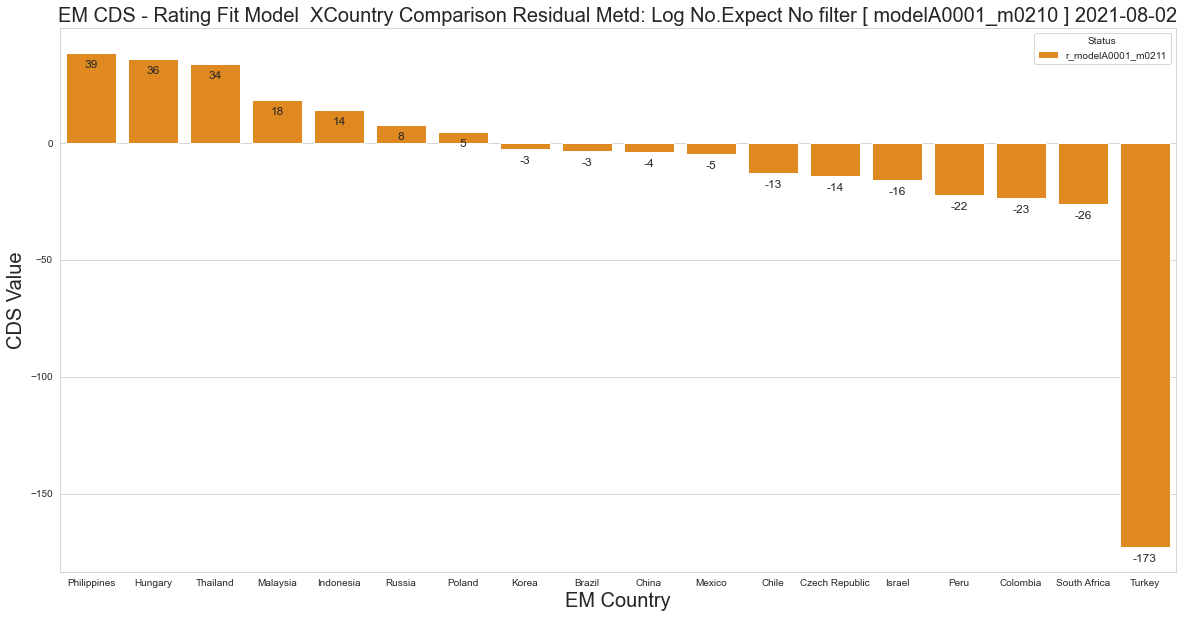

Complete!!!


In [32]:
#m0210 Log
#model 1 loga | all counntries nf | cds latest | rating


########update!--------------
name='modelA0001_m0210'
methodology="Metd: Log"
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name


#part1
########update!--------------
chart=base_em[['country','cds_latest','modelA0001_m0211']]
order_t=base_em[['country','cds_latest']]
order_t = order_t.sort_values(['cds_latest'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['cds_latest']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)


########---------------------
comparison="XCountry Comparison"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()




#part2 Residual
########update!--------------
chart=base_em[['country','r_modelA0001_m0211']]
order_p=chart
########update!--------------
order_p['average']=order_p[['r_modelA0001_m0211']].mean(axis=1)
order_t=order_p[['country','average']]
order_t = order_t.sort_values(['average'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['average']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
o_list = o_list.sort_values(['order_2'], ascending=[False])
o_list = o_list.reset_index()
o_list['order_2'] = (o_list.index + 1)

print(o_list)


########---------------------
comparison="XCountry Comparison"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+residual+location_last
r_name="r_"+name


print(df1)
chart.set_index('country', inplace=True)
del chart['average']
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
#del df1['average']
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["darkorange","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()


print("Complete!!!")

    order         country  order_1
0       5          Turkey       10
1       7    South Africa       20
2       0          Brazil       30
3       1        Colombia       40
4       6          Russia       50
5       2          Mexico       60
6       4            Peru       70
7      14       Indonesia       80
8       9         Hungary       90
9       3           Chile      100
10      8          Poland      110
11     16     Philippines      120
12     10          Israel      130
13     15        Malaysia      140
14     17        Thailand      150
15     13           China      160
16     11  Czech Republic      170
17     12           Korea      180
   order        order_sort  order_2
0      1        cds_latest        1
1      2  modelA0001_m0221        2
           country            Status      Values        order_sort  order_3
10          Turkey        cds_latest  410.889771        cds_latest       10
14    South Africa        cds_latest  207.878586        cds_latest       20

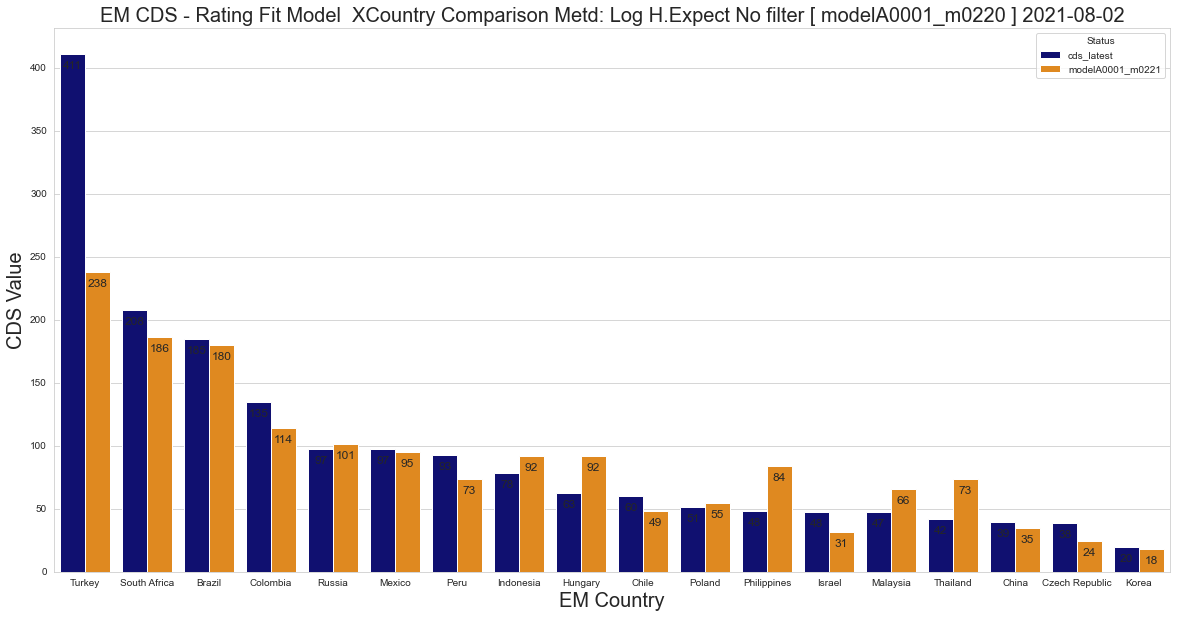

    order         country  order_1
0      16     Philippines       10
1      17        Thailand       20
2       9         Hungary       30
3      15        Malaysia       40
4      14       Indonesia       50
5       6          Russia       60
6       8          Poland       70
7       2          Mexico       80
8      12           Korea       90
9      13           China      100
10      0          Brazil      110
11      3           Chile      120
12     11  Czech Republic      130
13     10          Israel      140
14      4            Peru      150
15      1        Colombia      160
16      7    South Africa      170
17      5          Turkey      180
   index  order          order_sort  order_2
0      1      2             average        1
1      0      1  r_modelA0001_m0221        2
           country            Status      Values        order_sort  order_3
10          Turkey        cds_latest  410.889771        cds_latest       10
14    South Africa        cds_latest  207.878586

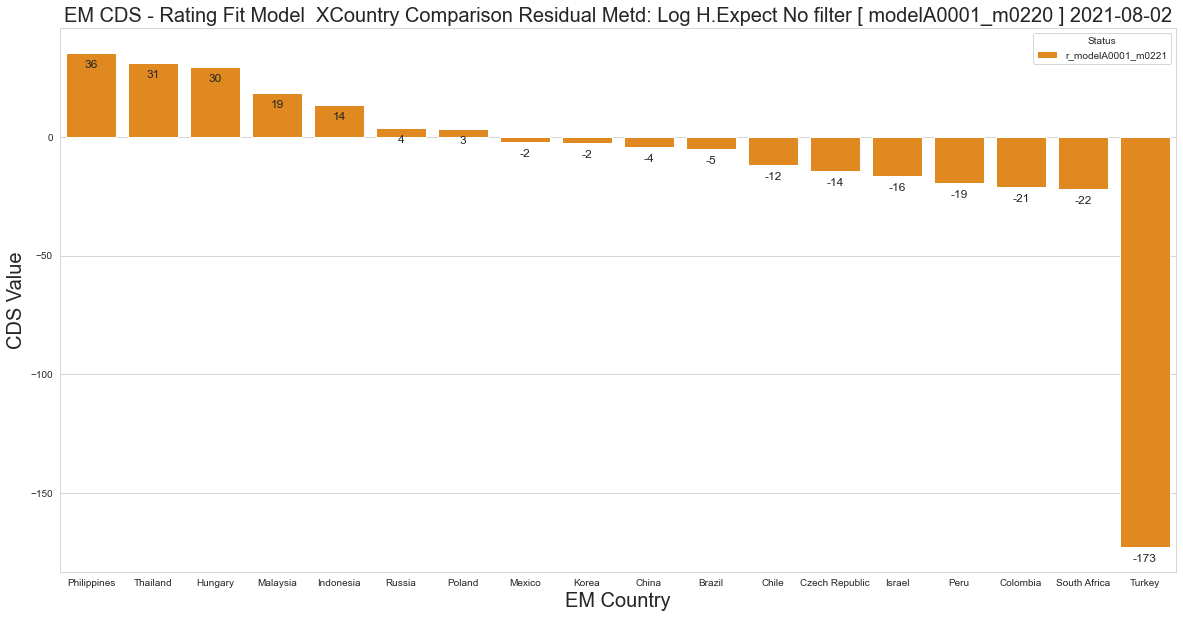

Complete!!!


In [33]:
#m0220 Log
#m0220
#model 1 loga | all counntries | cds latest | rating + outlook/0.5


########update!--------------
name='modelA0001_m0220'
methodology="Metd: Log"
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name


#part1
########update!--------------
chart=base_em[['country','cds_latest','modelA0001_m0221']]
order_t=base_em[['country','cds_latest']]
order_t = order_t.sort_values(['cds_latest'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['cds_latest']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)


########---------------------
comparison="XCountry Comparison"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()




#part2 Residual
########update!--------------
chart=base_em[['country','r_modelA0001_m0221']]
order_p=chart
########update!--------------
order_p['average']=order_p[['r_modelA0001_m0221']].mean(axis=1)
order_t=order_p[['country','average']]
order_t = order_t.sort_values(['average'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['average']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
o_list = o_list.sort_values(['order_2'], ascending=[False])
o_list = o_list.reset_index()
o_list['order_2'] = (o_list.index + 1)

print(o_list)


########---------------------
comparison="XCountry Comparison"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+residual+location_last
r_name="r_"+name


print(df1)
chart.set_index('country', inplace=True)
del chart['average']
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
#del df1['average']
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["darkorange","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()

print("Complete!!!")

    order         country  order_1
0       5          Turkey       10
1       7    South Africa       20
2       0          Brazil       30
3       1        Colombia       40
4       6          Russia       50
5       2          Mexico       60
6       4            Peru       70
7      14       Indonesia       80
8       9         Hungary       90
9       3           Chile      100
10      8          Poland      110
11     16     Philippines      120
12     10          Israel      130
13     15        Malaysia      140
14     17        Thailand      150
15     13           China      160
16     11  Czech Republic      170
17     12           Korea      180
   order        order_sort  order_2
0      1        cds_latest        1
1      2  modelA0001_m0231        2
           country            Status      Values        order_sort  order_3
10          Turkey        cds_latest  410.889771        cds_latest       10
14    South Africa        cds_latest  207.878586        cds_latest       20

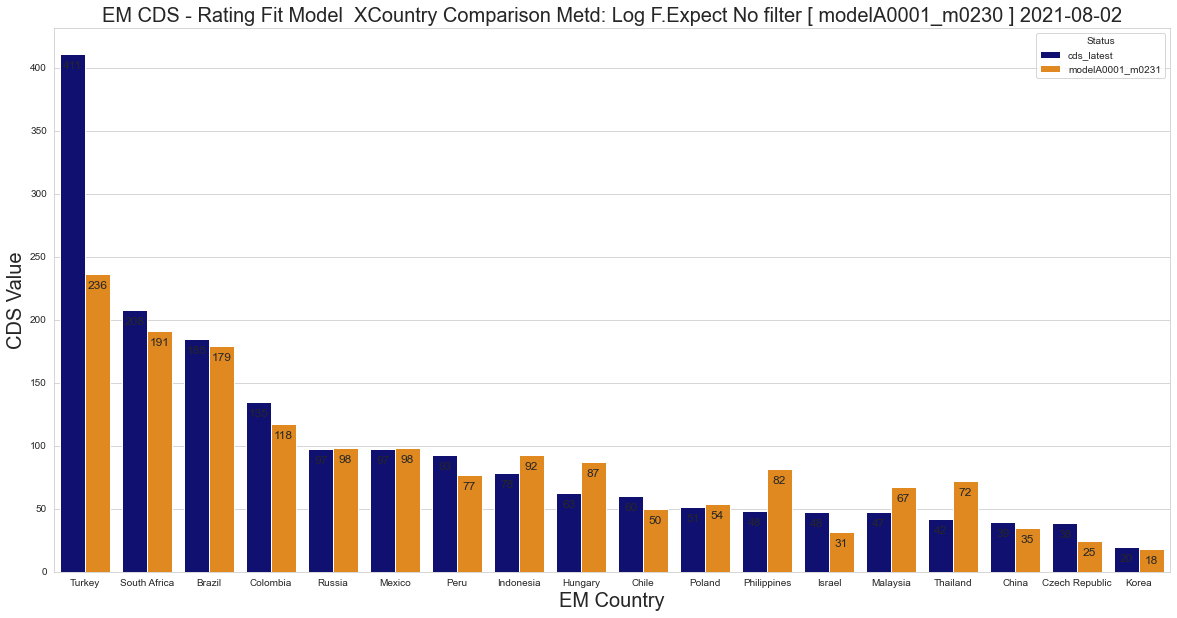

    order         country  order_1
0      16     Philippines       10
1      17        Thailand       20
2       9         Hungary       30
3      15        Malaysia       40
4      14       Indonesia       50
5       8          Poland       60
6       2          Mexico       70
7       6          Russia       80
8      12           Korea       90
9      13           China      100
10      0          Brazil      110
11      3           Chile      120
12     11  Czech Republic      130
13      4            Peru      140
14     10          Israel      150
15      7    South Africa      160
16      1        Colombia      170
17      5          Turkey      180
   index  order          order_sort  order_2
0      1      2             average        1
1      0      1  r_modelA0001_m0231        2
           country            Status      Values        order_sort  order_3
10          Turkey        cds_latest  410.889771        cds_latest       10
14    South Africa        cds_latest  207.878586

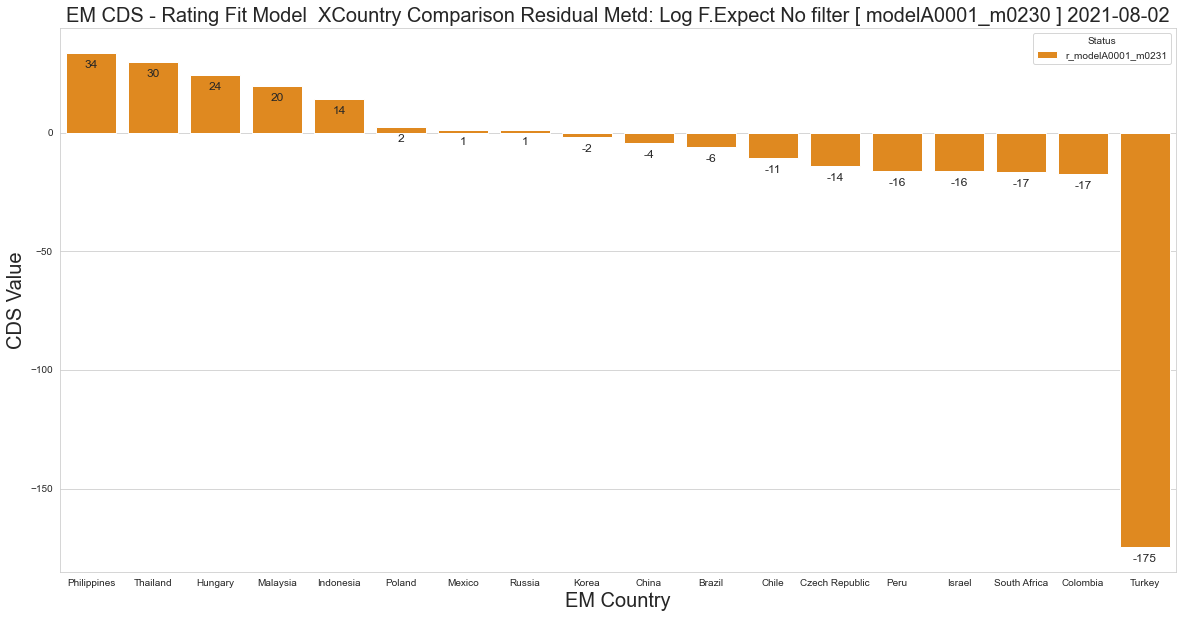

Complete!!!


In [34]:
#m0230 Log
#m0230
#model 1 loga | all counntries | cds latest | rating + outlook*1



########update!--------------
name='modelA0001_m0230'
methodology="Metd: Log"
########---------------------
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="F.Expect"
name_text=str("[ "+name+" ]")
title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name


#part1
########update!--------------
chart=base_em[['country','cds_latest','modelA0001_m0231']]
order_t=base_em[['country','cds_latest']]
order_t = order_t.sort_values(['cds_latest'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['cds_latest']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)


########---------------------
comparison="XCountry Comparison"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+location_last
r_name="r_"+name



chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()




#part2 Residual
########update!--------------
chart=base_em[['country','r_modelA0001_m0231']]
order_p=chart
########update!--------------
order_p['average']=order_p[['r_modelA0001_m0231']].mean(axis=1)
order_t=order_p[['country','average']]
order_t = order_t.sort_values(['average'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['average']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
o_list = o_list.sort_values(['order_2'], ascending=[False])
o_list = o_list.reset_index()
o_list['order_2'] = (o_list.index + 1)

print(o_list)


########---------------------
comparison="XCountry Comparison"
name_text=str("[ "+name+" ]")
p_text=str(p_parameter)
title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
location=location_first+name+residual+location_last
r_name="r_"+name


print(df1)
chart.set_index('country', inplace=True)
del chart['average']
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
#del df1['average']
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#large and height
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                  palette=["darkorange","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(str(y_label), size=20)
plt.xlabel(str(c_label), size=20)
plt.title(str(title_text), size=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location, bbox_inches='tight')
plt.show()


print("Complete!!!")

In [35]:
#asdasdads
#K:\2020_2431\q\cds_report\images\rating_fit
    
    
#part 3 pdf ALL COUNTRUES
os.chdir('K:/2020_2431/q/cds_report/images/rating_fit')
print(os.getcwd())

    
final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\rating_fit\\report_m\\003")
final_location_last = '.pdf'

   

#cds  #######
list_im = ["modelA0001_m0110_fig.jpg","modelA0001_m0110Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0110c_fig"+final_location_last) )    




#cds  #######
list_im = ["modelA0001_m0120_fig.jpg","modelA0001_m0120Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0120c_fig"+final_location_last) )    



#cds  #######
list_im = ["modelA0001_m0130_fig.jpg","modelA0001_m0130Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0130c_fig"+final_location_last) )    



######

#cds  #######
list_im = ["modelA0001_m0210_fig.jpg","modelA0001_m0210Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0210c_fig"+final_location_last) )    




#cds  #######
list_im = ["modelA0001_m0220_fig.jpg","modelA0001_m0220Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0220c_fig"+final_location_last) )    



#cds  #######
list_im = ["modelA0001_m0230_fig.jpg","modelA0001_m0230Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0001_m0230c_fig"+final_location_last) )    






print("Complete!!!")

#https://www.kaggle.com/asimislam/python-colors-color-cmap-palette
#lightsalmon
#yellow
#moccasin
#lightyellow
#khaki
#charts comaprings cds vs model set x4
#chart comapriong and soring the residula x4
#chartes comparing the CDS vs vs the average, median max min
#chart comapriong and soring the residula  vs the average, median max min x4 

K:\2020_2431\q\cds_report\images\rating_fit
Complete!!!


In [36]:
#print(base)
base.to_clipboard(excel = True)

In [45]:
#######find lcarte column vbeofre modesl
### tehn calcualte the differences

 
base["cds_latest"] = base["cds_latest"].round(2)

base["modelA0001_m0111"] = base["modelA0001_m0111"].round(2)
base["modelA0001_m0112"] = base["modelA0001_m0112"].round(2)
base["modelA0001_m0113"] = base["modelA0001_m0113"].round(2)
base["modelA0001_m0121"] = base["modelA0001_m0121"].round(2)
base["modelA0001_m0122"] = base["modelA0001_m0122"].round(2)
base["modelA0001_m0123"] = base["modelA0001_m0123"].round(2)
base["modelA0001_m0131"] = base["modelA0001_m0131"].round(2)
base["modelA0001_m0132"] = base["modelA0001_m0132"].round(2)
base["modelA0001_m0133"] = base["modelA0001_m0133"].round(2)
base["modelA0001_m0211"] = base["modelA0001_m0211"].round(2)
base["modelA0001_m0221"] = base["modelA0001_m0221"].round(2)
base["modelA0001_m0231"] = base["modelA0001_m0231"].round(2)




base["r_modelA0001_m0111"] = base["r_modelA0001_m0111"].round(2)
base["r_modelA0001_m0112"] = base["r_modelA0001_m0112"].round(2)
base["r_modelA0001_m0113"] = base["r_modelA0001_m0113"].round(2)
base["r_modelA0001_m0121"] = base["r_modelA0001_m0121"].round(2)
base["r_modelA0001_m0122"] = base["r_modelA0001_m0122"].round(2)
base["r_modelA0001_m0123"] = base["r_modelA0001_m0123"].round(2)
base["r_modelA0001_m0131"] = base["r_modelA0001_m0131"].round(2)
base["r_modelA0001_m0132"] = base["r_modelA0001_m0132"].round(2)
base["r_modelA0001_m0133"] = base["r_modelA0001_m0133"].round(2)
base["r_modelA0001_m0211"] = base["r_modelA0001_m0211"].round(2)
base["r_modelA0001_m0221"] = base["r_modelA0001_m0221"].round(2)
base["r_modelA0001_m0231"] = base["r_modelA0001_m0231"].round(2)

In [40]:
table_df=base[['country','rating_moodys','rating_sp','rating_fitch','average_rating_n','cds_latest',
               "modelA0001_m0111","modelA0001_m0112","modelA0001_m0113","modelA0001_m0121","modelA0001_m0122","modelA0001_m0123",
               "modelA0001_m0131","modelA0001_m0132","modelA0001_m0133","modelA0001_m0211","modelA0001_m0221","modelA0001_m0231"]]


em =['Brazil','Colombia','Mexico','Chile','Peru','Turkey','Russia','South Africa','Poland',
     'Hungary','Israel','Czech Republic','Korea','China','Indonesia','Malaysia','India','Philippines','Thailand']

em_f = table_df.country.isin(em)
table_df = table_df[em_f]
table_df=table_df.reset_index(drop=True)
print(table_df)

           country rating_moodys rating_sp rating_fitch  average_rating_n  \
0           Brazil           Ba2       BB-          BB-              8.33   
1         Colombia          Baa2       BB+         BBB-             11.00   
2           Mexico          Baa1       BBB         BBB-             12.00   
3            Chile            A1         A           A-             15.00   
4             Peru            A3      BBB+         BBB+             13.33   
5           Turkey            B2       B+u          BB-              7.00   
6           Russia          Baa3      BBB-          BBB             11.33   
7     South Africa           Ba2       BB-          BB-              8.33   
8           Poland            A2        A-           A-             14.33   
9          Hungary          Baa3       BBB          BBB             11.67   
10          Israel            A1       AA-           A+             16.33   
11  Czech Republic           Aa3       AA-          AA-             17.00   

2021-08-02 14:50:40.808515
K:\2020_2431\q\cds_report\images\rating_fit\modelA0001_m0230Residual_fig.jpg


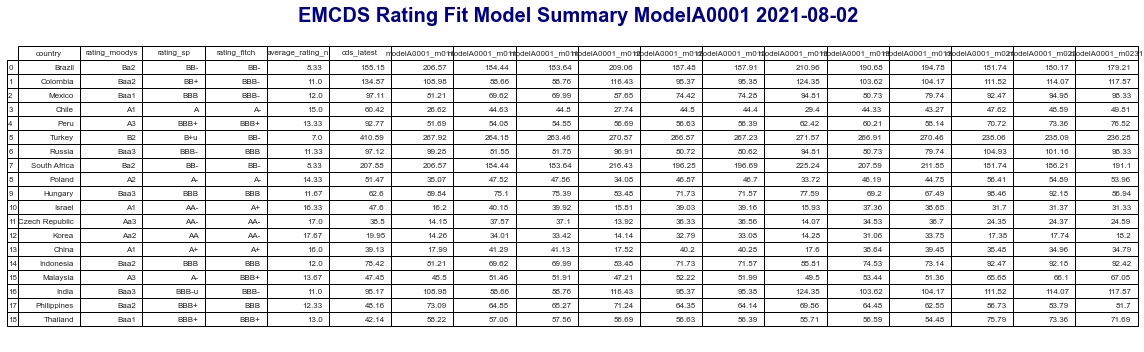

Complete!!!!


In [43]:
####nned to do 2 tables of summary  


ms = pd.DataFrame(table_df)

#PART 1 SUMARRY  
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
#print(os.getcwd())


final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\rating_fit\\report_m\\")
final_location_last = '.pdf'

#file location
#location_first= ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\")
today = str(date.today())+"_"
#location_last = '_fig.pdf'

#title_graph="EM CDS - Rating Fit Model "
label="EMCDS Rating Fit Model Summary ModelA0001"
dateTimeObj = str(datetime.now())
print(dateTimeObj)
#location=location_first+today+label+location_last
#location=location_first+label+dateTimeObj+location_last
print(location)

parameter_sum1 = 18
parameter_sum2 = 6
parameter_fontsize =8
parameter_t_fontsize = 20
parameter_f_fontsize = 15

today0 = str(date.today())

# set fig size
fig, ax = plt.subplots(figsize=(16, 5)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
#here 
#loc='upper right'
tab = table(ax, ms, loc='center')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(parameter_fontsize) 
plt.title(str(label+" "+today0), size=parameter_t_fontsize,loc='center',weight='bold',color='darkblue')
plt.xlabel("TODAY DATE TIME", size=20)
plt.tight_layout()
# save the result
#plt.savefig(location)
#plt.savefig("001_summary_economic.pdf")
plt.savefig(final_location_first+ "001_summary_Rating" +final_location_last )








plt.show()
print("Complete!!!!")

           country rating_moodys rating_sp rating_fitch  average_rating_n  \
0           Brazil           Ba2       BB-          BB-              8.33   
1         Colombia          Baa2       BB+         BBB-             11.00   
2           Mexico          Baa1       BBB         BBB-             12.00   
3            Chile            A1         A           A-             15.00   
4             Peru            A3      BBB+         BBB+             13.33   
5           Turkey            B2       B+u          BB-              7.00   
6           Russia          Baa3      BBB-          BBB             11.33   
7     South Africa           Ba2       BB-          BB-              8.33   
8           Poland            A2        A-           A-             14.33   
9          Hungary          Baa3       BBB          BBB             11.67   
10          Israel            A1       AA-           A+             16.33   
11  Czech Republic           Aa3       AA-          AA-             17.00   

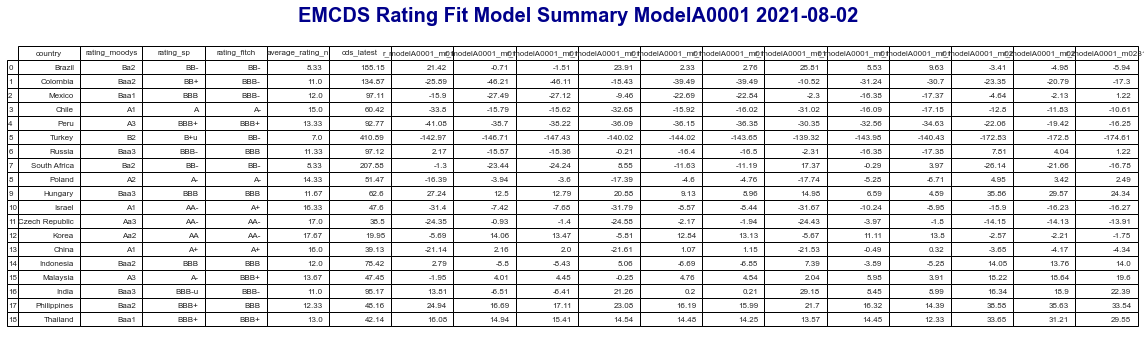

Complete!!!!


In [47]:
####second summmarey table

table_df2=base[['country','rating_moodys','rating_sp','rating_fitch','average_rating_n','cds_latest',
                "r_modelA0001_m0111","r_modelA0001_m0112","r_modelA0001_m0113",
                "r_modelA0001_m0121","r_modelA0001_m0122","r_modelA0001_m0123",
                "r_modelA0001_m0131","r_modelA0001_m0132","r_modelA0001_m0133",
                "r_modelA0001_m0211","r_modelA0001_m0221","r_modelA0001_m0231"]]


em2 =['Brazil','Colombia','Mexico','Chile','Peru','Turkey','Russia','South Africa','Poland',
     'Hungary','Israel','Czech Republic','Korea','China','Indonesia','Malaysia','India','Philippines','Thailand']

em_f2 = table_df2.country.isin(em)
table_df2 = table_df2[em_f2]
table_df2=table_df2.reset_index(drop=True)
print(table_df2)




ms2 = pd.DataFrame(table_df2)

#PART 1 SUMARRY  
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
#print(os.getcwd())


final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\rating_fit\\report_m\\")
final_location_last = '.pdf'

#file location
#location_first= ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\")
today = str(date.today())+"_"
#location_last = '_fig.pdf'

#title_graph="EM CDS - Rating Fit Model "
label="EMCDS Rating Fit Model Summary ModelA0001"
dateTimeObj = str(datetime.now())
print(dateTimeObj)
#location=location_first+today+label+location_last
#location=location_first+label+dateTimeObj+location_last
print(location)

parameter_sum1 = 18
parameter_sum2 = 6
parameter_fontsize =8
parameter_t_fontsize = 20
parameter_f_fontsize = 15

today0 = str(date.today())

# set fig size
fig, ax = plt.subplots(figsize=(16, 5)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
#here 
#loc='upper right'
tab = table(ax, ms2, loc='center')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(parameter_fontsize) 
plt.title(str(label+" "+today0), size=parameter_t_fontsize,loc='center',weight='bold',color='darkblue')
plt.xlabel("TODAY DATE TIME", size=20)
plt.tight_layout()
# save the result
#plt.savefig(location)
#plt.savefig("001_summary_economic.pdf")
plt.savefig(final_location_first+ "001_summary_Rating_2" +final_location_last )








plt.show()
print("Complete!!!!")



In [39]:
####output aggregate



source_dir = 'K:/2020_2431/q/cds_report/images/rating_fit/report_m/'
source_dir2 = 'K:/2020_2431/q/cds_report/images/rating_fit/report_f/'
merger = PdfFileMerger()

for item in os.listdir(source_dir):
    if item.endswith('pdf'):
        #print(item)
        merger.append(source_dir + item)

merger.write(source_dir2 + 'EMCDS_0001_Rating_Complete.pdf')       
merger.close()

In [40]:
print(table_df)

######save output
output001 = table_df[['country','cds_latest',
                      'modelA0001_m0111','modelA0001_m0112','modelA0001_m0113',
                      'modelA0001_m0121','modelA0001_m0122','modelA0001_m0123',
                      'modelA0001_m0131','modelA0001_m0132','modelA0001_m0133',
                      'modelA0001_m0211','modelA0001_m0221','modelA0001_m0231']]
#max_date=output004['time'].max()
#print(max_date)
#output004=output004[output004.time == max_date ]
output001['model001_m0110']=output001[['modelA0001_m0111','modelA0001_m0112','modelA0001_m0113']].mean(axis=1)
output001['model001_m0120']=output001[['modelA0001_m0121','modelA0001_m0122','modelA0001_m0123']].mean(axis=1)
output001['model001_m0130']=output001[['modelA0001_m0131','modelA0001_m0132','modelA0001_m0133']].mean(axis=1)
output001['model001_m0200']=output001[['modelA0001_m0211','modelA0001_m0221','modelA0001_m0231']].mean(axis=1)
output001['model001_m0110']=output001['model001_m0110'].round(1)
output001['model001_m0120']=output001['model001_m0120'].round(1)
output001['model001_m0130']=output001['model001_m0130'].round(1)
output001['model001_m0200']=output001['model001_m0200'].round(1)
output001=output001[['country','cds_latest','model001_m0110','model001_m0120','model001_m0130','model001_m0200']]
print(output001)
output001.to_csv (r'K:\2020_2431\q\cds_report\output\output001.csv', index = False, header=True)


           country rating_moodys rating_sp rating_fitch  cds_latest  \
0           Brazil           Ba2       BB-          BB-      185.15   
1         Colombia          Baa2       BB+         BBB-      134.87   
2           Mexico          Baa1       BBB         BBB-       97.11   
3            Chile            A1         A           A-       60.42   
4             Peru            A3      BBB+         BBB+       92.77   
5           Turkey            B2       B+u          BB-      410.89   
6           Russia          Baa3      BBB-          BBB       97.12   
7     South Africa           Ba2       BB-          BB-      207.88   
8           Poland            A2        A-           A-       51.47   
9          Hungary          Baa3       BBB          BBB       62.60   
10          Israel            A1       AA-           A+       47.60   
11  Czech Republic           Aa3       AA-          AA-       38.50   
12           Korea           Aa2        AA          AA-       19.95   
13    

In [41]:


#https://www.kaggle.com/asimislam/python-colors-color-cmap-palette
#lightsalmon
#yellow
#moccasin
#lightyellow
#khaki
#charts comaprings cds vs model set x4
#chart comapriong and soring the residula x4
#chartes comparing the CDS vs vs the average, median max min
#chart comapriong and soring the residula  vs the average, median max min x4 